## Ralph Mouawad - M2 Data Science

## Ecole Polytechnique - Practical Introduction to Machine Learning

## Lab 1 - Unsupervised Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

## 1 - Dataset

1.1 - 1.3 - Loading the Data

1) Load the Data

In [3]:
temper = np.load('temper.npz')
digits = np.load('digits.npz')

In [4]:
xt, yt, x, y = digits['xt'], digits['yt'], digits['x'], digits['y']

In [5]:
x2= np.concatenate((xt, x))
y2= np.concatenate((yt, y))

In [6]:
x2= x2/255.0

In [7]:
x1 = temper['data'][:,:12]

2) Quick look at the Data

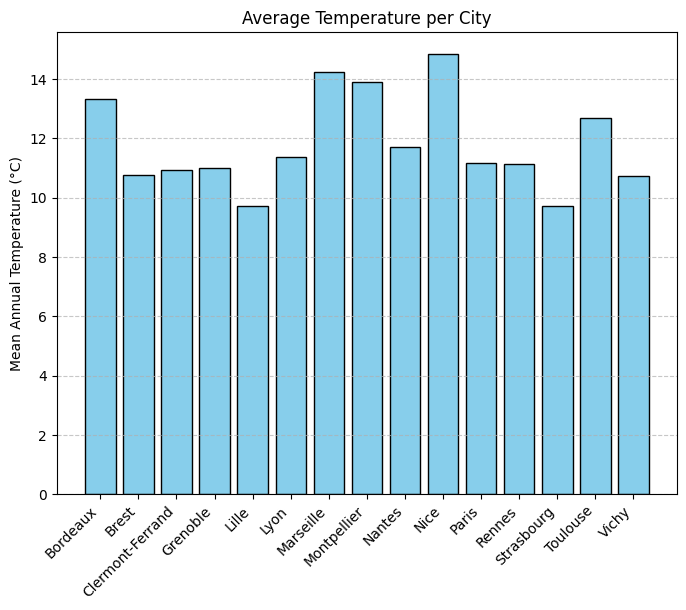

In [ ]:
## Temperature

means = x1.mean(axis=1)
villes = temper['villes']

plt.figure(figsize=(8,6))
plt.bar(villes, means, color="skyblue", edgecolor="black")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean Annual Temperature (°C)")
plt.title("Average Temperature per City")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


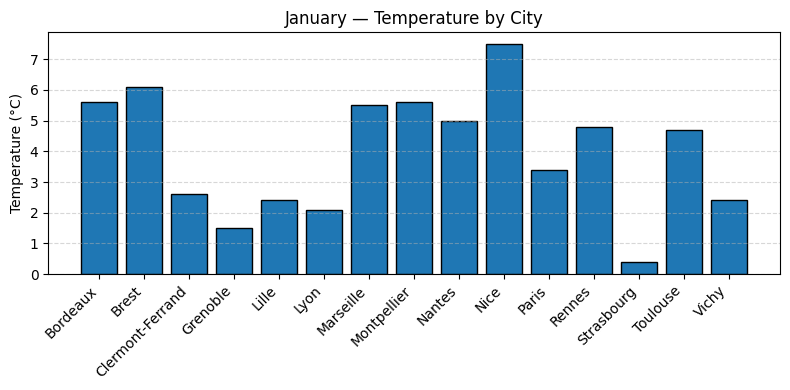

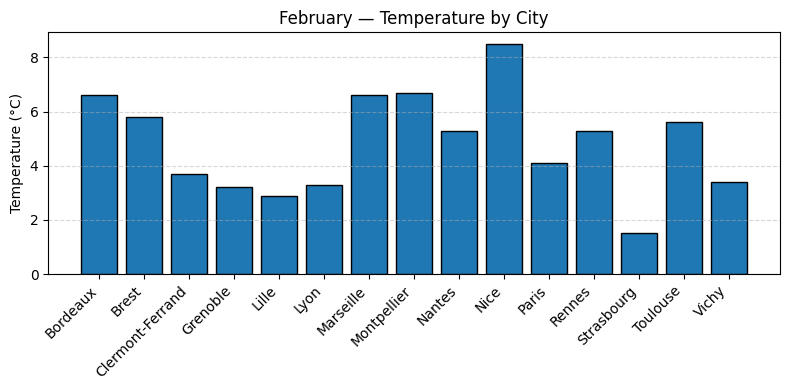

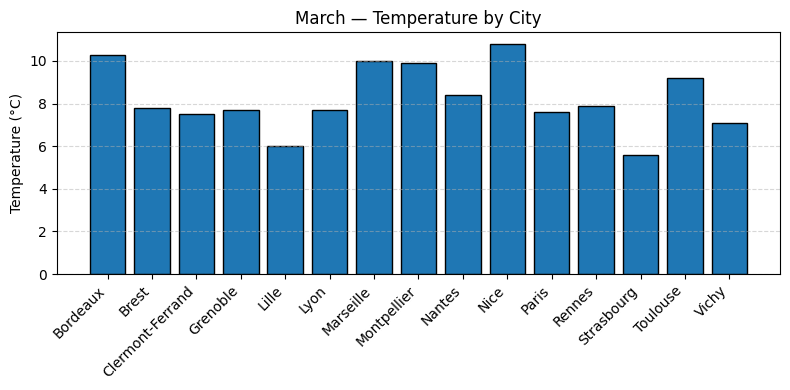

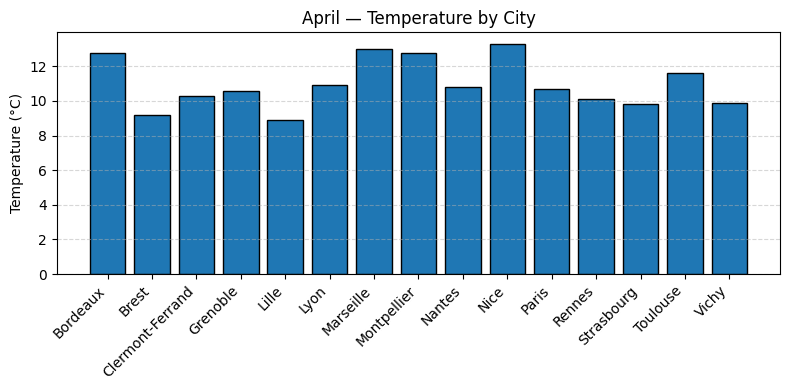

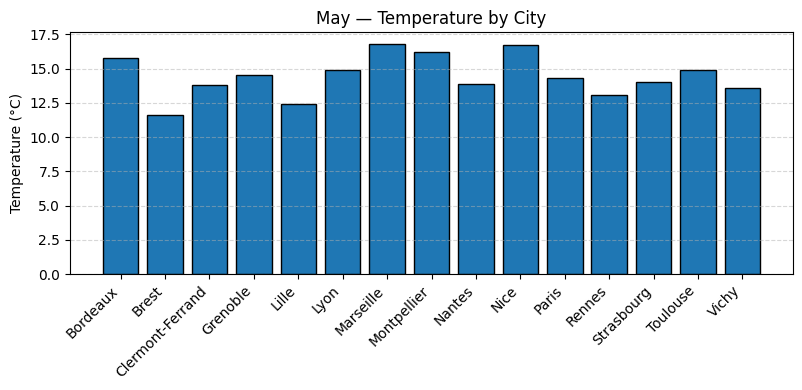

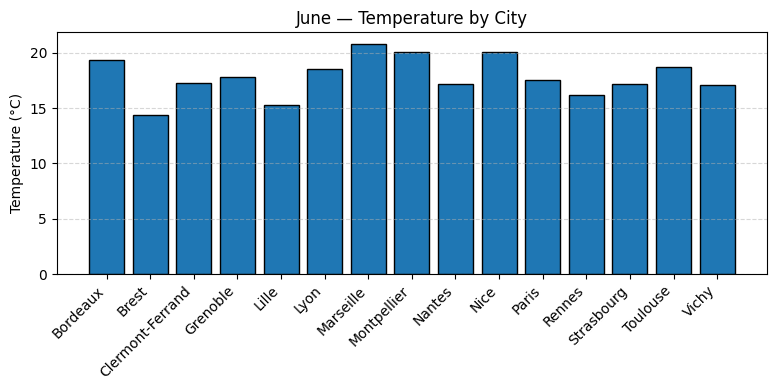

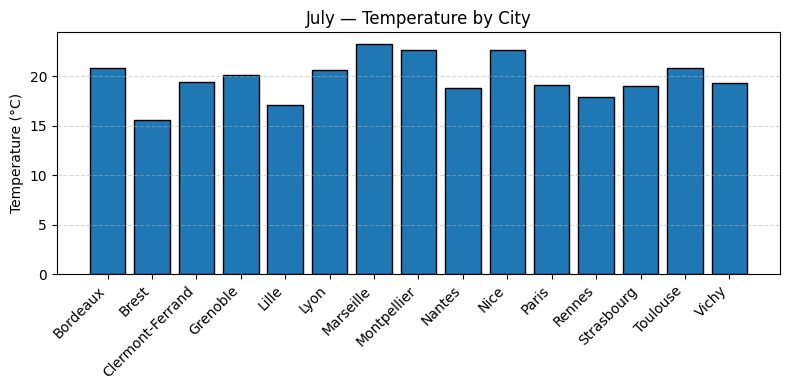

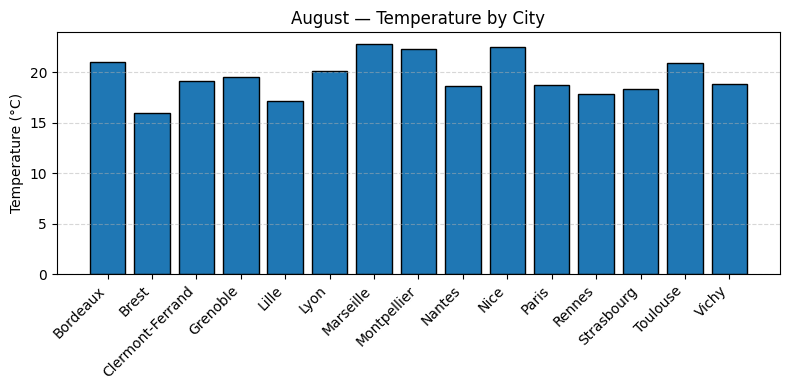

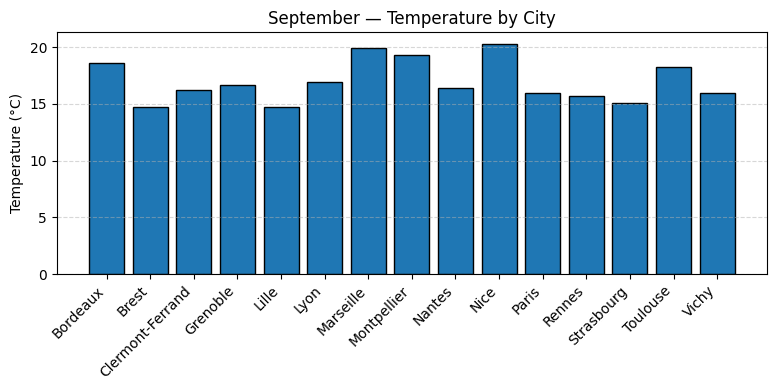

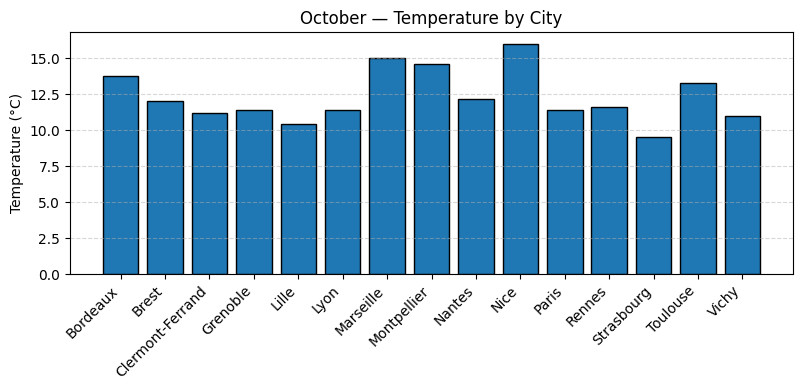

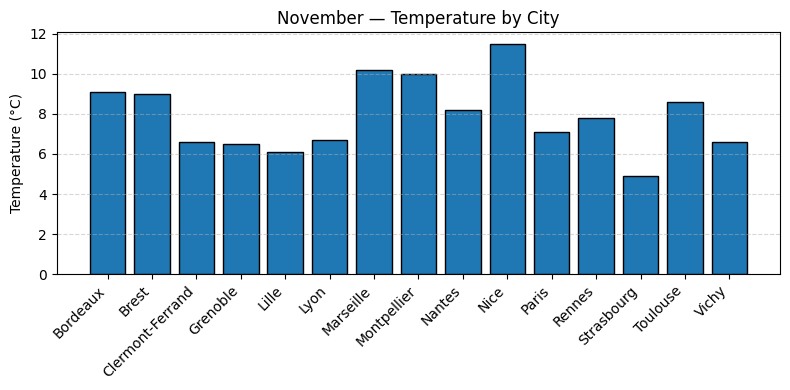

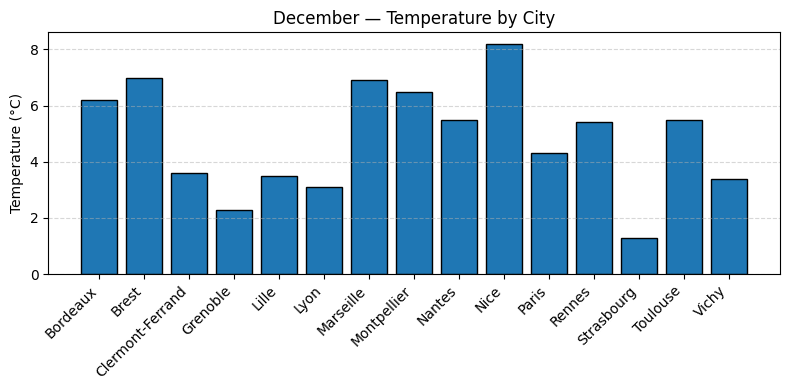

In [ ]:
temps  = np.asarray(x1)                     # (15, 12)
villes = list(temper['villes'])
months = (list(temper['varname'][:12])
          if hasattr(temper, "files") and 'varname' in temper.files
          else [f"Month {i+1}" for i in range(temps.shape[1])])

for m in range(temps.shape[1]):
    plt.figure(figsize=(8,4))
    plt.bar(villes, temps[:, m], edgecolor="black")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Temperature (°C)")
    plt.title(f"{months[m]} — Temperature by City")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


I will do a small analysis for some cities that show similar behaviors:
- Marseille and Montpellier, across all months, have very close temperatures. It is also higher than many other cities.
- Strasbourg has the lowest temperature during winter and autumn seasons, it should be located in an area a bit isolated from the others.
- Nice has the highest temperature across all months.
- Brest and Rennes have also similar temperature behaviors.

When we will apply clustering, we should see cities that show similar temperature behaviors clustered together. We should also expect that these cities are located close to each other (i.e, low vs high latitude and longitude). I will elaborate more on this when I apply the models.

We can see some patterns related to the temperature for each city. For example, Marseille and Montpellier seem to have close temperatures on average, same for Paris and Rennes. Lille and Strasbourg, on the other hand seem to have a special kind of temperature, which is lower and not similar to others. We should expect to see cities that have close temperatures clustered together. We should also expect that cities with similar temperature behavior are located close to each other.

Digit 1: 1500 samples (33.33%)
Digit 7: 1500 samples (33.33%)
Digit 8: 1500 samples (33.33%)


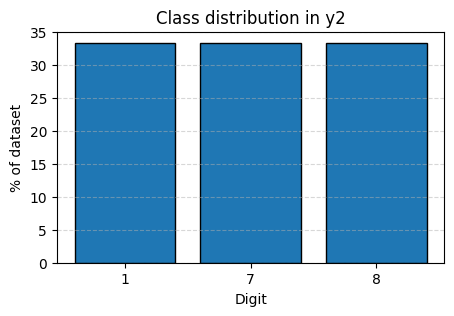

In [ ]:
## Digits dataset
y2 = y2.ravel()

# Counts and proportions per class
classes, counts = np.unique(y2, return_counts=True)
proportions = counts / counts.sum()

# Print a small summary
for c, n, p in zip(classes, counts, proportions):
    print(f"Digit {int(c)}: {n} samples ({p:.2%})")

# Bar chart (percentage)
plt.figure(figsize=(5,3))
plt.bar([str(int(c)) for c in classes], proportions * 100, edgecolor='k')
plt.ylabel("% of dataset")
plt.xlabel("Digit")
plt.title("Class distribution in y2")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


Our samples are equally distributed. This means we're not suffering from imbalanced distributions between classes.

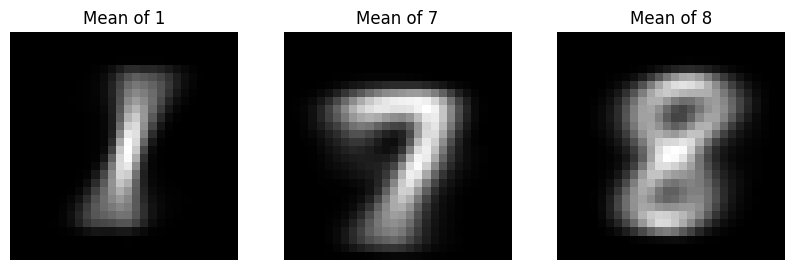

In [ ]:
## Digits Dataset

y2= y2.ravel()

classes = np.unique(y2)

plt.figure(figsize=(10,4))

for i, c in enumerate(classes):
    # Select all images of class c
    class_images = x2[y2 == c]  # shape: (n_class_samples, 784)

    # Compute pixel-wise mean
    mean_image = class_images.mean(axis=0)

    # Reshape back to 28x28
    mean_image_2d = mean_image.reshape(28,28)

    # Plot
    plt.subplot(1, len(classes), i+1)
    plt.imshow(mean_image_2d, cmap="gray")
    plt.title(f"Mean of {c}")
    plt.axis("off")

plt.show()

- Digit '1': The fact that every image is a bit rotated makes the mean image like an 'I'. But we can realize that the vertical shape is clear, meaning that the pixel values in the middle vertical axis across all samples are close to each other.
- Digit '7': We can see the shape of this number (horizontal then diagonal line) but the middle horizontal line doesn't appear much. This can mislead the ML models by wrongly classifying the digit '7' as a '1'.
- Digit '8': The mean image looks clearly like the number '8'. In the holes we see a bit of colors, which might be due that some pictures have a different distribution of pixels than others.

However, all images suffer from bluriness, which is due to the fact that not all of them are similar. This is due to some samples being rotated or damaged. Check the plot below where we display some samples and compare how they appear.

3) Reproducing the Figures

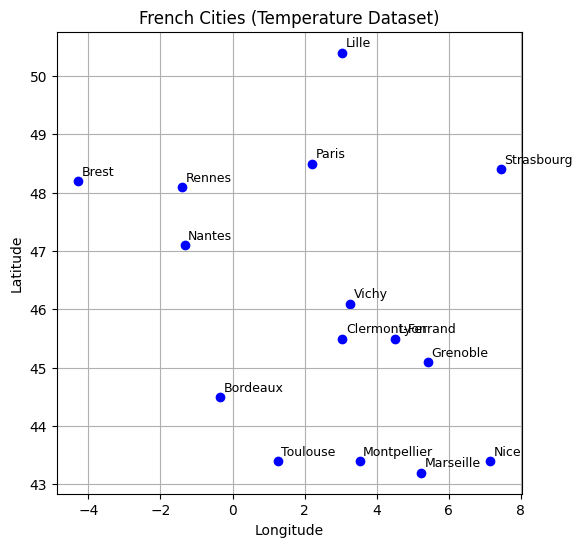

In [ ]:
data = temper['data']
villes = temper['villes']

lat = data[:, -2] # latitude
lon = data[:, -1] #longitude

# Plot
plt.figure(figsize=(6,6))
plt.scatter(lon, lat, c='blue', marker='o')

for i, city in enumerate(villes):
    plt.text(lon[i] + 0.1, lat[i] + 0.1, city, fontsize=9)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("French Cities (Temperature Dataset)")
plt.grid(True)
plt.show()


Marseille and Montpellier, having a close temperature behavior, appear to be close to each other by location. This confirms one of the assumptions made before that close cities might have similar temperatures. Strasbourg, which appeared to have the lowest temperatures among all countries, seem to be isolated from the other cities.

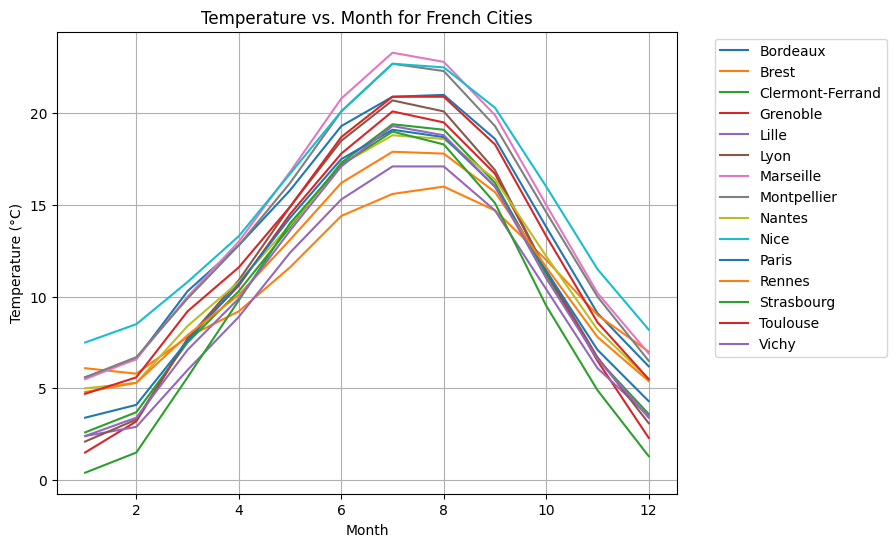

In [ ]:
temps = data[:, :12]
months = np.arange(1, 13)

plt.figure(figsize=(8,6))

for i, city in enumerate(villes):
    plt.plot(months, temps[i], label=city)

plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs. Month for French Cities")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


We can identify several patterns:
- Almost all cities have the same trend: low temperature at the beginning of the year (winter season), then it gets high between months 5 and 8 (when we move to spring then to summer), then it gets low again (autumn then winter season). The key difference between each plot is the average temperature between each city and the other. For example, Marseille and Nice's temperature plots are always above Lille and Toulouse. This suggests that the average temperatures of the first 2 cities are higher than the others.

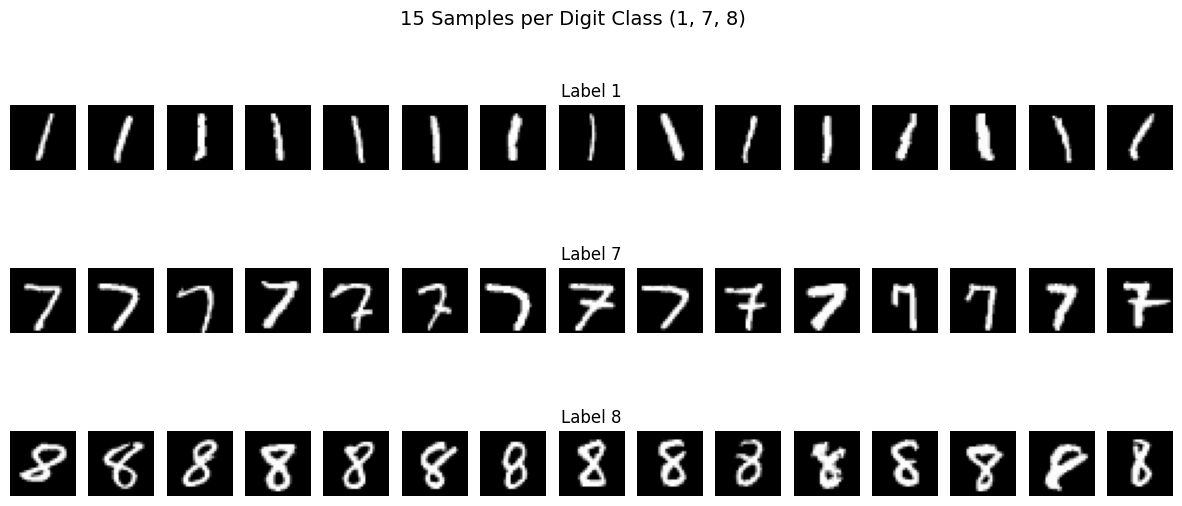

In [ ]:
n_show = 15 # i want 15 samples per class
classes = np.unique(y2) # the 3 unique classes

plt.figure(figsize=(n_show, len(classes)*2))

for j, label in enumerate(classes):
    idxs = np.where(y2 == label)[0][:n_show]

    for i, idx in enumerate(idxs):
        plt.subplot(len(classes), n_show, j*n_show + i + 1)
        plt.imshow(x2[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        if i == n_show // 2:
            plt.title(f"Label {label}")

plt.suptitle("15 Samples per Digit Class (1, 7, 8)", fontsize=14)
plt.show()


We can notice few issues:
- The images representing the digit '1' look very similar, with few of them being less dense than the others, some being rotated or flipped. This explains why the mean image of the digit '1' looks blurred and like an 'I'.
- The images representing the digit '7' are not very good: some of them are well represented, others look like the digit '1', some look blurry and more dense than others. This can affect clustering as it might cluster some '7' digits as '1' digits. The fact that the middle horizontal line is not present in most samples explains why the mean image's middle line is not dense.
- For the digit '8', many are well represented, others look erased and blurry.

## 2- Clustering

2.1- For both datasets

1) K Means with K=3
2) Plotting the Clusters

In [ ]:
from sklearn.cluster import KMeans
K = 3
clf = KMeans(n_clusters=K)

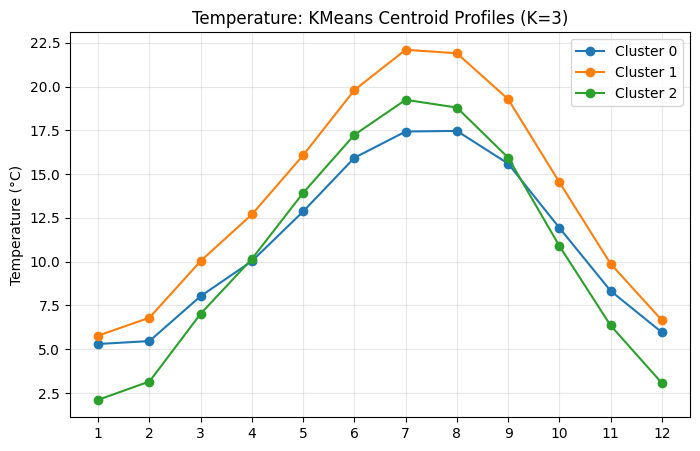

In [ ]:
## Temperature Dataset

y1 = clf.fit_predict(x1)
dist1 = clf.transform(x1)
C1 = clf.cluster_centers_

plt.figure(figsize=(8,5))
for i in range(K):
    plt.plot(range(12), C1[i], marker='o', label=f'Cluster {i}')


plt.xticks(range(12), months, rotation=0)
plt.ylabel("Temperature (°C)")
plt.title("Temperature: KMeans Centroid Profiles (K=3)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

This plot includes the temperature for 12 months for each cluster. We can see that KMeans generated 3 classes that we can classify as low, mid and high temperature. But also, cluster 2 has a colder winter but hotter summer than cluster 0. This shows that KMeans created 3 centroids based on the temperature for 12 months. Below, we will plot the geographical locations of the cities as well as the class they were assigned to. We will see if we can recover the locations based on the temperature.

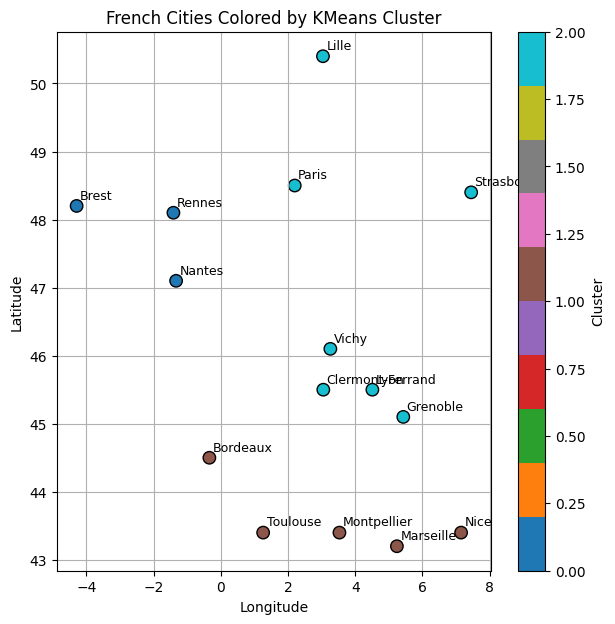

In [ ]:
# Data
data = temper['data']
villes = temper['villes']

lat = data[:, -2]   # latitude
lon = data[:, -1]   # longitude

# labels_temp is the cluster assignment from KMeans (shape: (15,))
plt.figure(figsize=(7,7))

# Scatter cities, color by cluster
scatter = plt.scatter(lon, lat, c=y1, cmap="tab10", s=80, edgecolor="k")

# Add city names
for i, city in enumerate(villes):
    plt.text(lon[i] + 0.1, lat[i] + 0.1, city, fontsize=9)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("French Cities Colored by KMeans Cluster")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()


Somehow, by clustering cities based on their temperatures for the past 12 months, we can somehow recover their geographical locations. For example, Brest and Rennes having similar temperatures, which were not too high during summer and not too low during winter, are clustered together. We see that they both have a relatively high latitude but a low longitude. Montpellier, Marseille and Nice having the highest temperatures across all seasons are clustered together, they are located with a low latitude and high longitude. However, Strasbourg was assigned to the cluster of Vichy, Grenoble... but it has a lower temperature behavior during winter. This is mainly due for it being closer to this cluster during the summer season, even if not very accurate. Perhaps if we increase the number of clusters we can identify better insights.

In [ ]:
### Digits Dataset
clf_2 = KMeans(n_clusters=K)

y2_clustering = clf_2.fit_predict(x2)
dist2 = clf_2.transform(x2)
C2 = clf_2.cluster_centers_

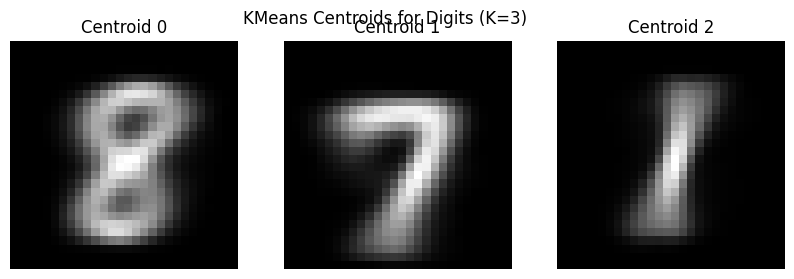

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

for i in range(K):
    centroid_img = C2[i].reshape(28, 28)   # reshape from 784 to 28x28
    plt.subplot(1, K, i+1)
    plt.imshow(centroid_img, cmap="gray")
    plt.title(f"Centroid {i}")
    plt.axis("off")

plt.suptitle(f"KMeans Centroids for Digits (K={K})")
plt.show()

We realise that the centroid images for each of the 3 clusters are similar to the mean-pixel images we plotted before. We can clearly recognize centroid 0 as the digit 1, centroid 1 as the digit 7, and centroid 2 as the digit 8. So yes, KMeans clustered based on the digit class. The reason why it worked well is that we assigned K=3 clusters, which is equal to the number of classes for these digits.

3) Testing different values for K

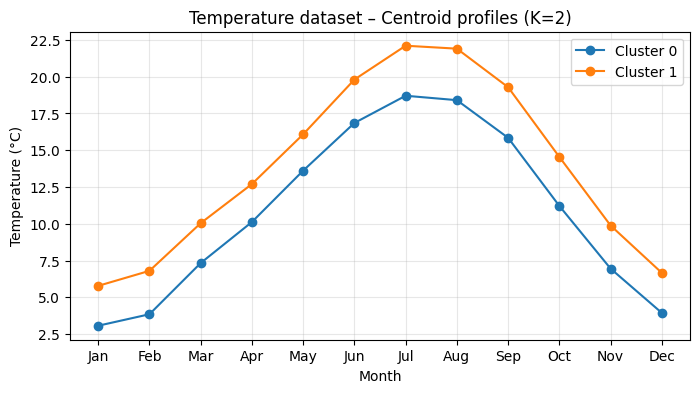

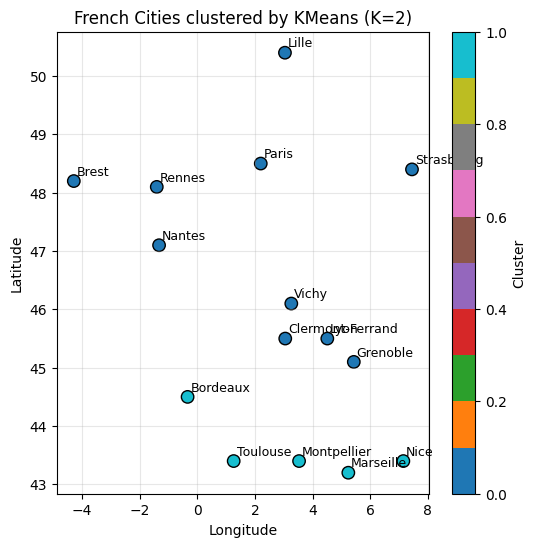

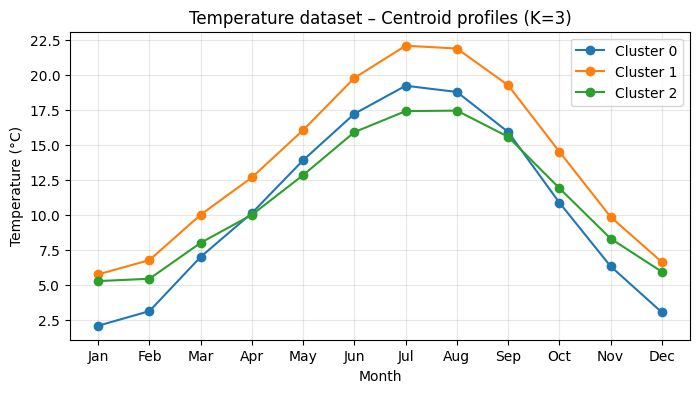

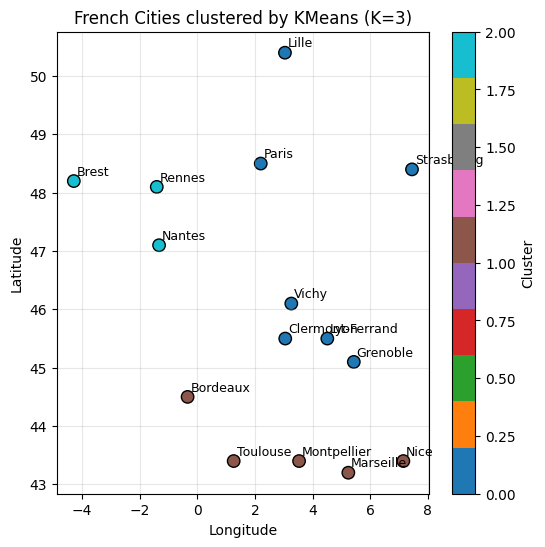

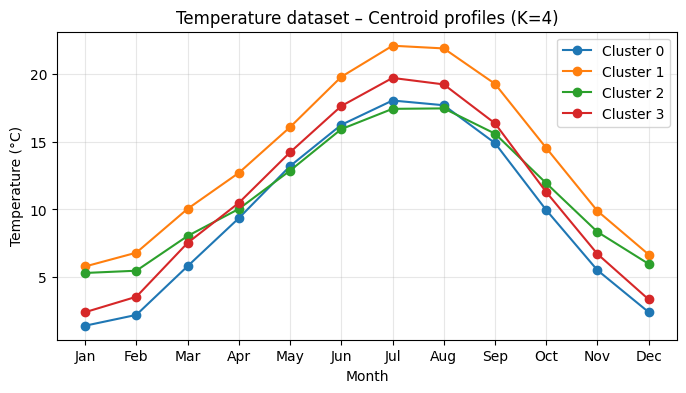

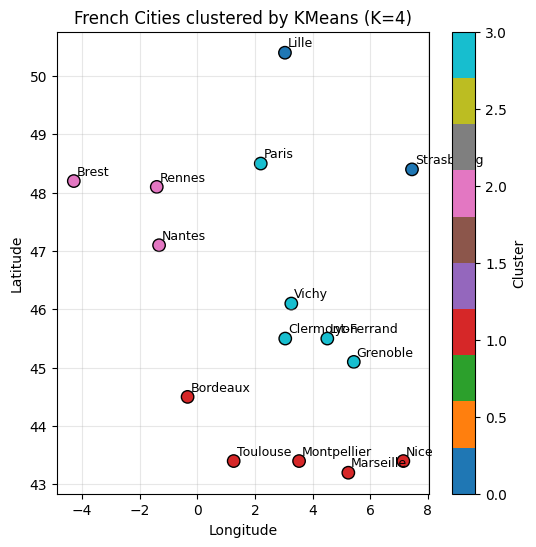

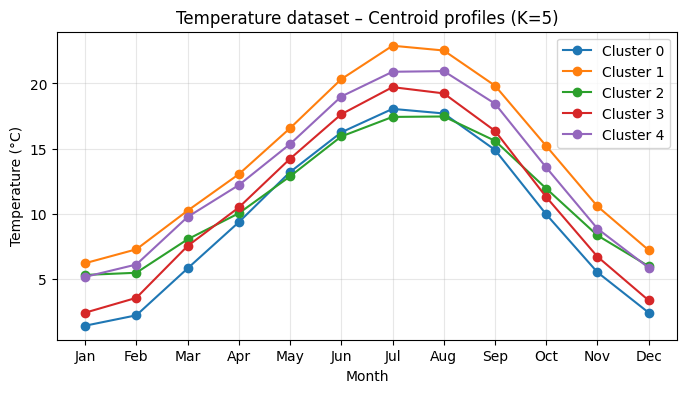

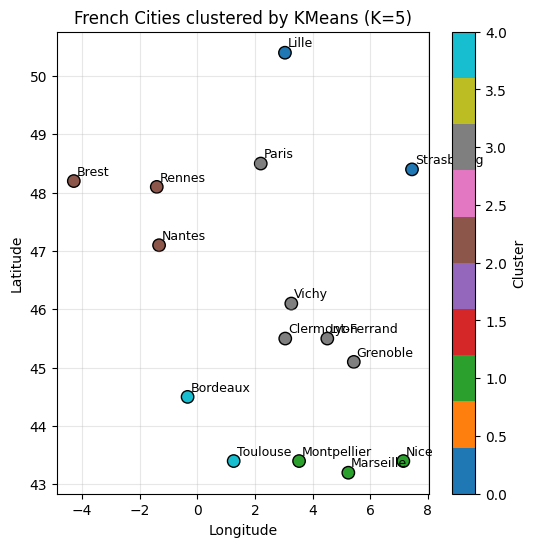

In [ ]:
### Temperature Dataset
## I will compare the centorids and the cities in each cluster for each value

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
lat = data[:, -2]
lon = data[:, -1]
villes = temper['villes']

Ks = [2, 3, 4, 5]   # values of K to test

for K in Ks:
    # Fit KMeans
    km = KMeans(n_clusters=K, n_init=50, random_state=42)
    labels = km.fit_predict(x1)           # (15,)
    centroids = km.cluster_centers_       # (K, 12)

    # Plot centroid curves
    plt.figure(figsize=(8,4))
    for i in range(K):
        plt.plot(range(12), centroids[i], marker="o", label=f"Cluster {i}")
    plt.xticks(range(12), months)
    plt.title(f"Temperature dataset – Centroid profiles (K={K})")
    plt.xlabel("Month")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Plot cities on map with clusters
    plt.figure(figsize=(6,6))
    scatter = plt.scatter(lon, lat, c=labels, cmap="tab10", s=80, edgecolor="k")
    for i, city in enumerate(villes):
        plt.text(lon[i]+0.1, lat[i]+0.1, city, fontsize=9)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"French Cities clustered by KMeans (K={K})")
    plt.colorbar(scatter, label="Cluster")
    plt.grid(alpha=0.3)
    plt.show()


For K=2, it only clustered cities with highest temperatures together (low latitude and high longitude) and all others as the other class. This is clearly too simple.

When we increased the number of clusters to 4, we realised that centroids 0 and 2 are very close to each other during summer, and this might be inefficient. However by looking at the cities plotted, we can see that Strasbourg and Lille, having a lower temparature behavior from others during winter, were assigned to the same class. We can see a bit that cities with highest temperatures are clustered together and both have a low latitude and high longitude. Cities with slightly lower temperatures like Vichy and Grenoble have a higher latitude than the ones before.
Paris was clustered with Vichy, Clermont and Grenoble, those having a higher temperature during summer than Brest, Rennes and Nantes. However, Paris is closer to the last 3, and the reason why it was clustered with the ones with higher temperatures can be due to its increased pollution rate leading to higher temperatures.

For K=5, the centroids are very close to each other, and maybe it is not an optimal value.

To be able to compute the best value for 'K', we will use the elbow method.

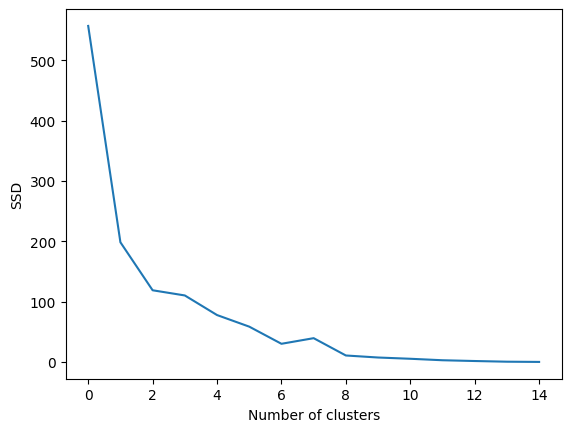

In [ ]:
ssd=[] ## I will apply the elbow method based on the sum of squared distances
for num_clusters in list(range(1,16)):

  model_clus= KMeans(n_clusters=num_clusters)
  model_clus.fit(x1)
  ssd.append(model_clus.inertia_)
plt.plot(ssd)
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

The elbow method shows that the optimal number of clusters to assign is 3 and 5. This is based on the minimum sum of squared distance between every point and its centroid. In the next step, I will fit KMeans with K=4 and interpret the results for the Temperature dataset. There is a tradeoff between the quality of the centroids and the geographical locations when choosing K=3 and K=4. I will elaborate more on this in the question 2.2.

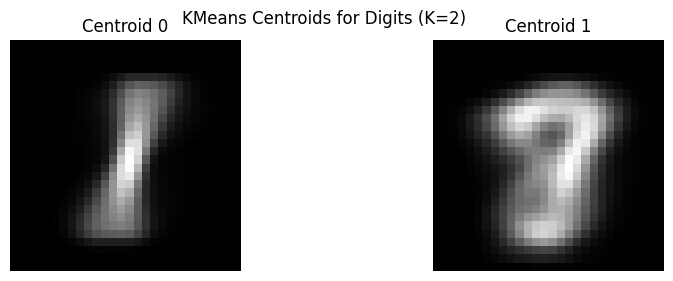

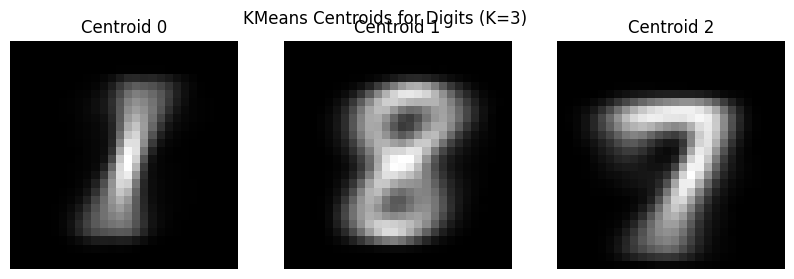

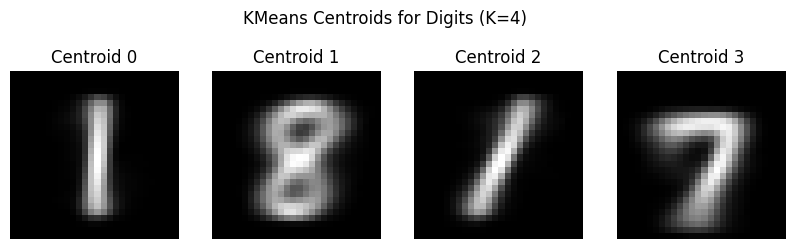

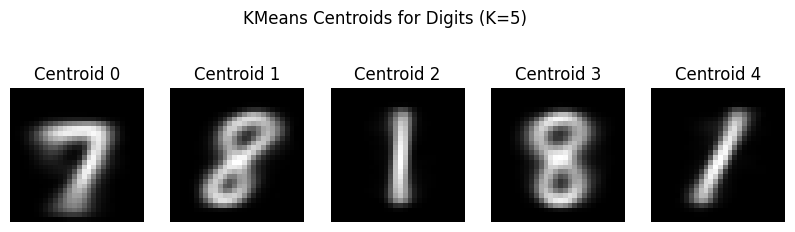

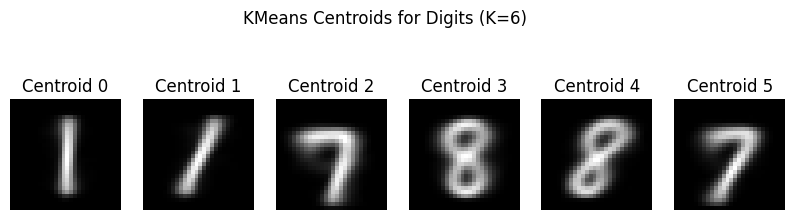

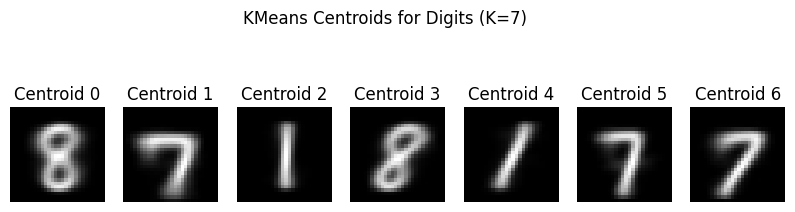

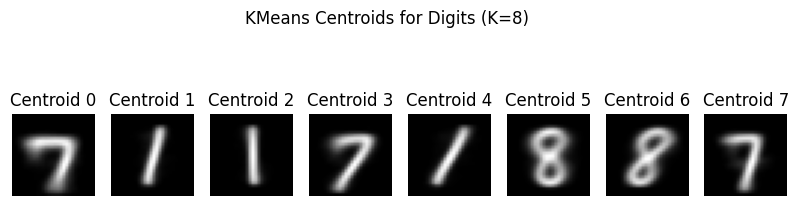

In [ ]:
### Digits Dataset. I will plot the centroids of each cluster for different values of K

Ks = [2, 3, 4, 5, 6, 7, 8]   # values of K to test

for K in Ks:
    # Fit KMeans
    km = KMeans(n_clusters=K, n_init=50, random_state=42)
    labels = km.fit_predict(x2)           # (15,)
    centroids = km.cluster_centers_       # (K, 12)

    plt.figure(figsize=(10, 3))

    for i in range(K):
      centroid_img = centroids[i].reshape(28, 28)   # reshape from 784 to 28x28
      plt.subplot(1, K, i+1)
      plt.imshow(centroid_img, cmap="gray")
      plt.title(f"Centroid {i}")
      plt.axis("off")
    plt.suptitle(f"KMeans Centroids for Digits (K={K})")
    plt.show()

We can see that when we use K=2 clusters, we have one centroid that looks like the digit 1, and another that seems like a combination of 7 and 8. Clearly, it is not a correct one.

For K=3, we have the best results.

When we start increasing K>3, we can see new centroids, being one of the 3 classes but rotated.
- K =4: We recognize the centroids as the digits 1, 7 and 8. But we also have another centroid that is the digit '1' but rotated to the right. This means that the model identified these samples as being another class.
- K=5: We now have 2 classes for the digit '8', one being rotated.
- K=6: We have a centroid representing the number '7' where the vertical line is a diagonal one.
- K=7We have an extra centroid representing the digit '7' where we see a bit of the middle line that should be used to differentiate digits '1' and '7'.
- K=8: We added an extra centroid for the digit '1'.
This is mainly due to the fact that many samples, for each class, are modified images (rotated, flipped, cropped... like we said in the first part).
The next step is to identify the best number of clusters using the elbow method.

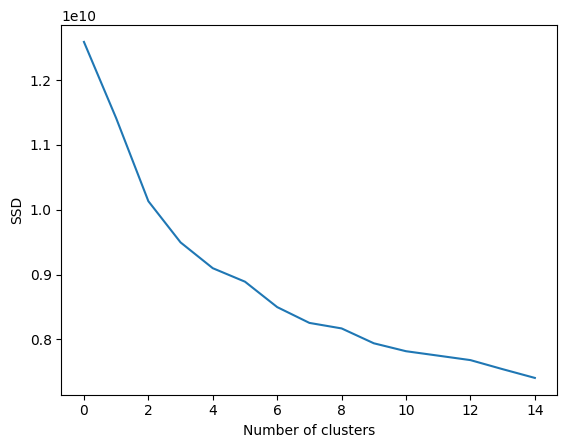

In [ ]:
## Elbow method for digits dataset
ssd=[] ## I will apply the elbow method based on the sum of squared distances
for num_clusters in list(range(1,16)):

  model_clus= KMeans(n_clusters=num_clusters)
  model_clus.fit(x2)
  ssd.append(model_clus.inertia_)
plt.plot(ssd)
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

If we take the 2 tangents, we identify the best number of clusters to be K=3. By a simple visualization, it is also very reasonable to assign this number of clusters, as it includes a generalization of the 3 digits 1, 7 and 8. When we assign more clusters, the model will focus on tiny detail like rotations or slight modifications and put the images as one different cluster. For the next part, I will use K=3 for the digits dataset.

2.2) Temperature Dataset

For this part, I will use K=3 and K=4 and explain the advantages and weaknesses of each. First I will plot again the average temperature for each city.

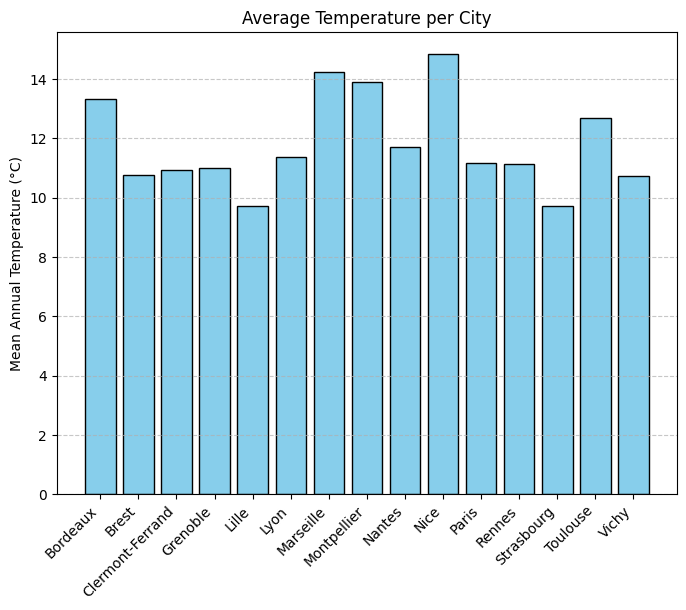

In [ ]:
means = x1.mean(axis=1)
villes = temper['villes']

plt.figure(figsize=(8,6))
plt.bar(villes, means, color="skyblue", edgecolor="black")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean Annual Temperature (°C)")
plt.title("Average Temperature per City")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

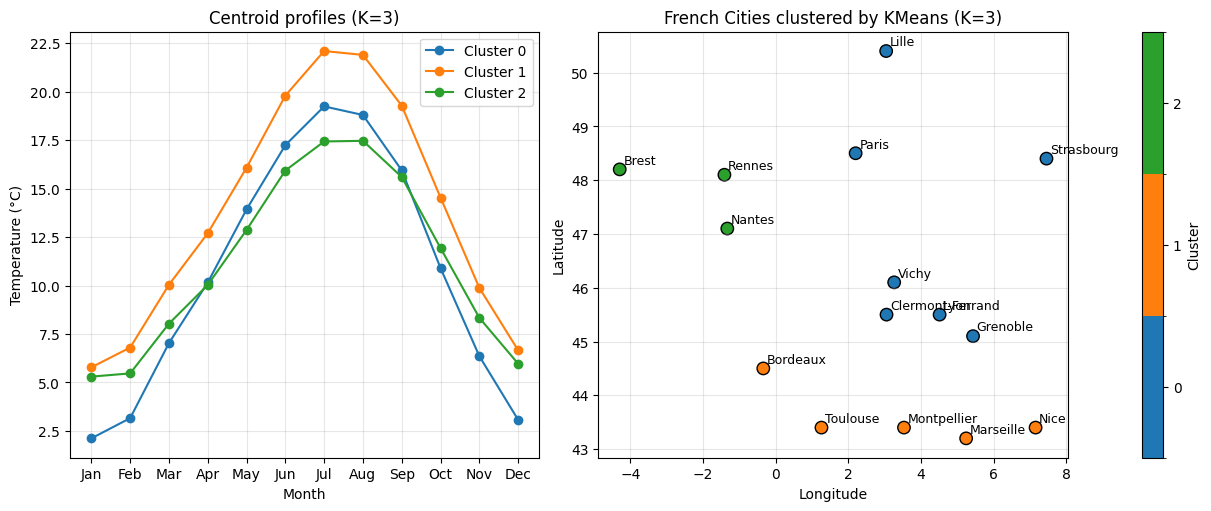

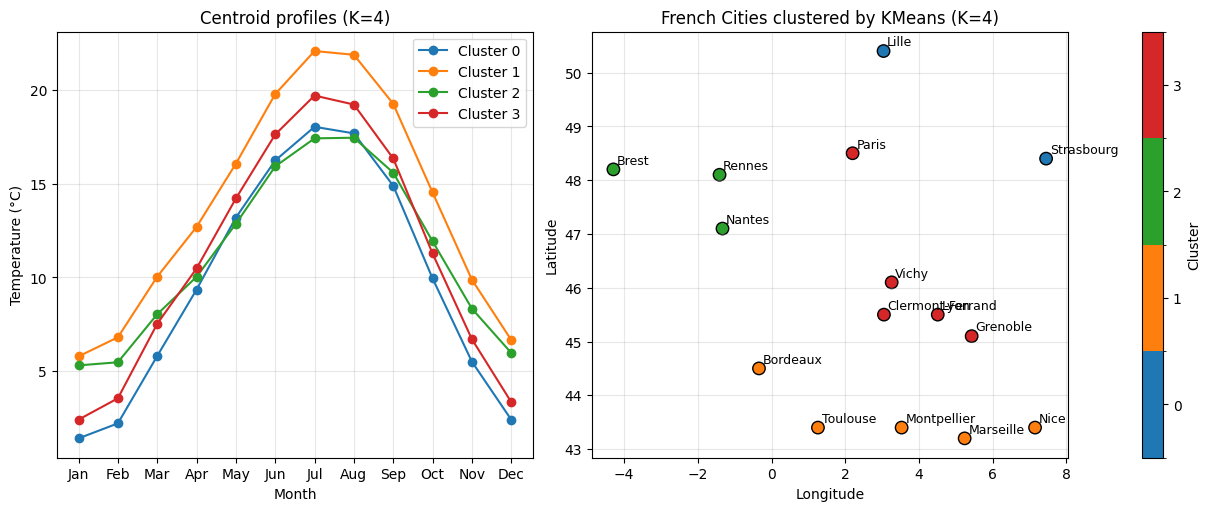

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.cluster import KMeans

# Data
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
lat = data[:, -2]
lon = data[:, -1]
villes = temper['villes']

Ks = [3, 4]

for K in Ks:
    # Fit KMeans
    km = KMeans(n_clusters=K, n_init=50, random_state=42)
    labels = km.fit_predict(x1)           # (15,)
    centroids = km.cluster_centers_       # (K, 12)

    # Shared palette so colors match between panels
    base_colors = plt.get_cmap("tab10").colors
    palette = [base_colors[i % len(base_colors)] for i in range(K)]
    cmap = ListedColormap(palette)
    norm = BoundaryNorm(np.arange(-0.5, K+0.5), K)

    # Make the 1×2 layout
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

    # ---- Left: centroid profiles ----
    for i in range(K):
        ax1.plot(range(12), centroids[i], marker="o", label=f"Cluster {i}", color=palette[i])
    ax1.set_xticks(range(12))
    ax1.set_xticklabels(months)
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Temperature (°C)")
    ax1.set_title(f"Centroid profiles (K={K})")
    ax1.grid(alpha=0.3)
    ax1.legend()

    # ---- Right: cities on the map ----
    sc = ax2.scatter(lon, lat, c=labels, cmap=cmap, norm=norm, s=80, edgecolor="k")
    for i, city in enumerate(villes):
        ax2.text(lon[i] + 0.1, lat[i] + 0.1, city, fontsize=9)
    ax2.set_xlabel("Longitude")
    ax2.set_ylabel("Latitude")
    ax2.set_title(f"French Cities clustered by KMeans (K={K})")
    ax2.grid(alpha=0.3)
    cbar = fig.colorbar(sc, ax=ax2, ticks=range(K))
    cbar.set_label("Cluster")

    plt.show()

From the average temperatures histogram we can identify:
- Rennes, Brest and Nantes have close average temperatures (high during winter but mid during summer).
- Bordeaux, Toulouse, Montepellier et Marseille have close and high average temperatures during all seasons.
- Vichy, Clermond, Grenoble and Paris have also close temperature behavior (low during winter but high during summer).
- Lille and Strasbourg have lower temperatures on average (closer to Vichy during winter...), but during hot times it is similar to Brest and its neighbors.

When we perform clustering with K=3, we realize the following:
- The 3 centroids represent well areas with high, medium and lower temperature. Areas with a low latitude have the highest, areas with a low longitude have the lowest temperatures during summer but not the coldest winter, and the rest (high longitude and mid->high latitude) have the coldest winter but a hotter summer than the second group. However, when clustered together, I found that it is not very intuitive to cluster Lille and Strasbourg with cluster 0. In fact these 2 have a very cold winter, but a reasonable summer, which is why it was classified like that. Their cold weather is closer to cluster 0 than cluster 2, but their hot weather is lower and closer to cluster 2.
- So here, when using K=3, we obtain good centroids but it isn't very intuitive to recover the geographical locations of the cities when they have high longitude and mid-> high latitude.

When we perform clustering with K=4, we realize the following:
- The centroids are good except that centroids 0 (Lille and Strasbourg) and 2 (Brest, Rennes and Nantes) seem to be very similar during summer. However cluster 0 has a much colder temperature during autumn and winter than cluster 2. But when we look at the geographical location, we can realize that it is more relevant to classify Strasbourg and Lilles together because of their special temperature during winter and autumn.
- So here, K=4 recovers a better geographical location, but the centroids 0 and 2 have very similar behavior during hot times which might be bad or unuseful to separate clusters.

In my opinion, I would adopt K=4 as it was the one classifying cities between low latitude and high longitude, low longitude and high latitude, high longitude and mid latitude, and finally high latitude and longitude.

2.3) Digits Dataset

1- Based on the plots above, we can say the following:
- Every centroid represents a digit. For K=3, representing the exact number of classes (1, 7, 8), we can directly recover the mean-images computed before and each one looks clearly like a digit. The reason is that clustering will group images that have close pixel values at every location. So the digit 1 will have high pixel values on the center diagonal for example, so all samples with this behavior will be clustered together and have a centroid that looks like 1. It is the same for all other digits.
- As we mentioned at the begining, the samples that we have are not all similar: for example, for the digit 1, some pictures are rotated. For the digit 7, some have cropped parts and look like the digit 1... This is why when we increased the number of clusters, the model started to differentiate between a rotated '1' vs an actual '1'. It is similar for other digits with higher values of K.
- This means that still, our centroids look like real images because it is clustering based on the density of pixels at certain regions, but it is not generalizing the digits' classes.
- I would pick K=3 as the optimal number of clusters because it was able to classify 1, 7 and 8 and did not separate similar digits.

2- Plotting predicted signals

I will run again KMeans with K=3 to use it for future questions, but here I will use x with 3000 samples instead of the concatenated x2 so I visualize every 1000 samples alone.

In [ ]:
x = x/255.0

In [ ]:
from sklearn.cluster import KMeans
K=3
clf_2 = KMeans(n_clusters=K)

y2_clustering = clf_2.fit_predict(x)
dist2 = clf_2.transform(x)
C2 = clf_2.cluster_centers_

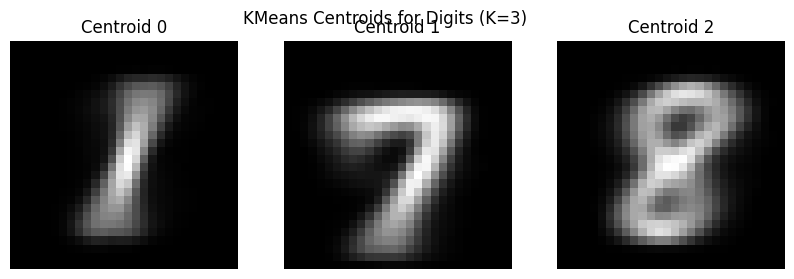

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

for i in range(3):
    centroid_img = C2[i].reshape(28, 28)   # reshape from 784 to 28x28
    plt.subplot(1, K, i+1)
    plt.imshow(centroid_img, cmap="gray")
    plt.title(f"Centroid {i}")
    plt.axis("off")

plt.suptitle(f"KMeans Centroids for Digits (K={K})")
plt.show()

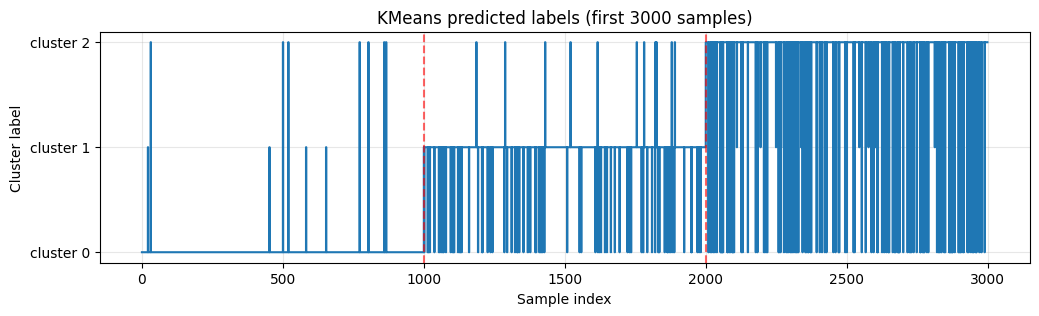

In [ ]:
plt.figure(figsize=(12,3))

# Only plot the first 3000 (original train set)
plt.step(np.arange(3000), y2_clustering[:3000].ravel(), where='post')

plt.yticks(range(3), [f"cluster {i}" for i in range(3)])
plt.xlabel("Sample index")
plt.ylabel("Cluster label")
plt.title("KMeans predicted labels (first 3000 samples)")
plt.grid(alpha=0.3)

# Mark true class boundaries (1000 samples per class)
plt.axvline(1000, color='r', linestyle='--', alpha=0.6)
plt.axvline(2000, color='r', linestyle='--', alpha=0.6)

plt.show()


We can see that our predicted labels don't follow exactly a piecewise constant function. The reason is the following:
- Many samples representing digit '1' are classified as '7'. The reason is that many pictures for the digit '7' are rotated in a way that makes it look like '1'. We also have this issue with digit '8' because of the cropped and rotated images.
- This is the same with other clusters. For instance many '7' are classified as '8' due to blurriness and cropped parts.

However many pictures were classified in a good way, and we will see this in the scores later on.

3- Quality of the CLusters

In [ ]:
from sklearn.metrics import rand_score, adjusted_rand_score

# Make sure y2 is 1D
y2_true = y.ravel()             # shape (4500,)
y2_pred = y2_clustering.ravel()  # shape (4500,)

ri  = rand_score(y2_true, y2_pred)
ari = adjusted_rand_score(y2_true, y2_pred)

print(f"Rand Index (RI):        {ri:.4f}")
print(f"Adjusted Rand Index:    {ari:.4f}")


Rand Index (RI):        0.8864
Adjusted Rand Index:    0.7459


Rand Index =0.8876 means that about 89% of all pairs of samples are clustered consistently with the true labels.

Adjusted Rand Index = 0.7482 menas that after correcting for chance, the accuracy is around 75%, which is still a good score.

4- Optimal 'K' for KMeans

K=2: ARI=0.4224
K=3: ARI=0.7482
K=4: ARI=0.6670
K=5: ARI=0.5943
Best K: 3 with ARI = 0.7481880864638025


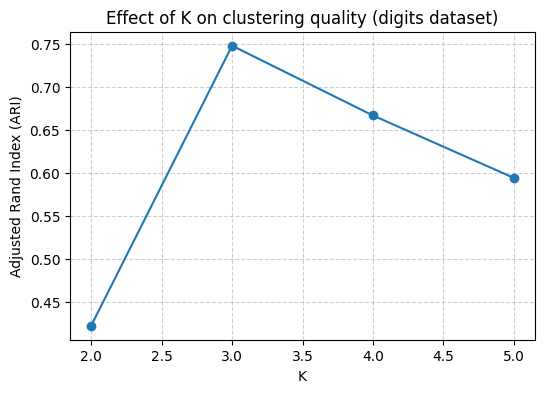

In [ ]:
X = x2 #i will use all the data pts
y_true = y2.ravel()

Ks = range(2, 6)
aris = []

for K in Ks:
    km = KMeans(n_clusters=K, n_init=50, random_state=42)
    y_pred = km.fit_predict(X)
    score = adjusted_rand_score(y_true, y_pred)
    aris.append(score)
    print(f"K={K}: ARI={score:.4f}")

best_K = Ks[int(np.argmax(aris))]
best_score = max(aris)

print("Best K:", best_K, "with ARI =", best_score)

plt.figure(figsize=(6,4))
plt.plot(Ks, aris, marker='o')
plt.xlabel("K")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("Effect of K on clustering quality (digits dataset)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

The best number of clusters is 3. This is logic because it is exactly the number of classes that we have. It makes more logic to generalize the 3 digits that we have instead of classifying each variant picture as a different one.

## Part 3 - Density Estimation

1-2- Fitting GMM on both datasets and Centers' Visualization

In [7]:
from sklearn.mixture import GaussianMixture

In [8]:
gmm_temp = GaussianMixture(n_components=2, random_state=42, covariance_type='diag')
gmm_temp.fit(x1)

GaussianMixture(covariance_type='diag', n_components=2, random_state=42)

In [9]:
gmm_digits = GaussianMixture(n_components=3, random_state=42, covariance_type='diag')
gmm_digits.fit(x2)

GaussianMixture(covariance_type='diag', n_components=3, random_state=42)

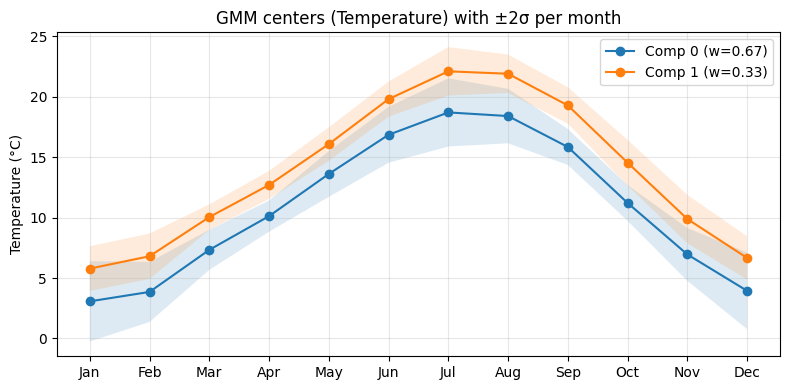

Comp 0: annual mean=10.8°C, seasonality (peak-to-trough)=15.6°C
Comp 1: annual mean=13.8°C, seasonality (peak-to-trough)=16.3°C


In [11]:
## GMM centers for the temperature dataset
means_1 = gmm_temp.means_
stds_1  = np.sqrt(gmm_temp.covariances_)
weights_1 = gmm_temp.weights_

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(8,4))
for k in range(means_1.shape[0]):
    mu_1 = means_1[k]
    sd_1 = stds_1[k]
    plt.plot(range(12), mu_1, marker='o', label=f'Comp {k} (w={weights_1[k]:.2f})')
    plt.fill_between(range(12), mu_1 - 2*sd_1, mu_1 + 2*sd_1, alpha=0.15)

plt.xticks(range(12), months)
plt.ylabel("Temperature (°C)")
plt.title("GMM centers (Temperature) with ±2σ per month")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# (Optional) quick numeric summary to aid interpretation
for k in range(means_1.shape[0]):
    mu_1 = means_1[k]
    print(f"Comp {k}: annual mean={mu_1.mean():.1f}°C, seasonality (peak-to-trough)={mu_1.max()-mu_1.min():.1f}°C")


The centers of our GMM centers look like the centroids of the KMeans model with K=2. Component 0 show a colder temperature component with weight 0.67, while component 1 represents a warmer temperature component with weight 0.33. I will plot now the centers with a histogram.

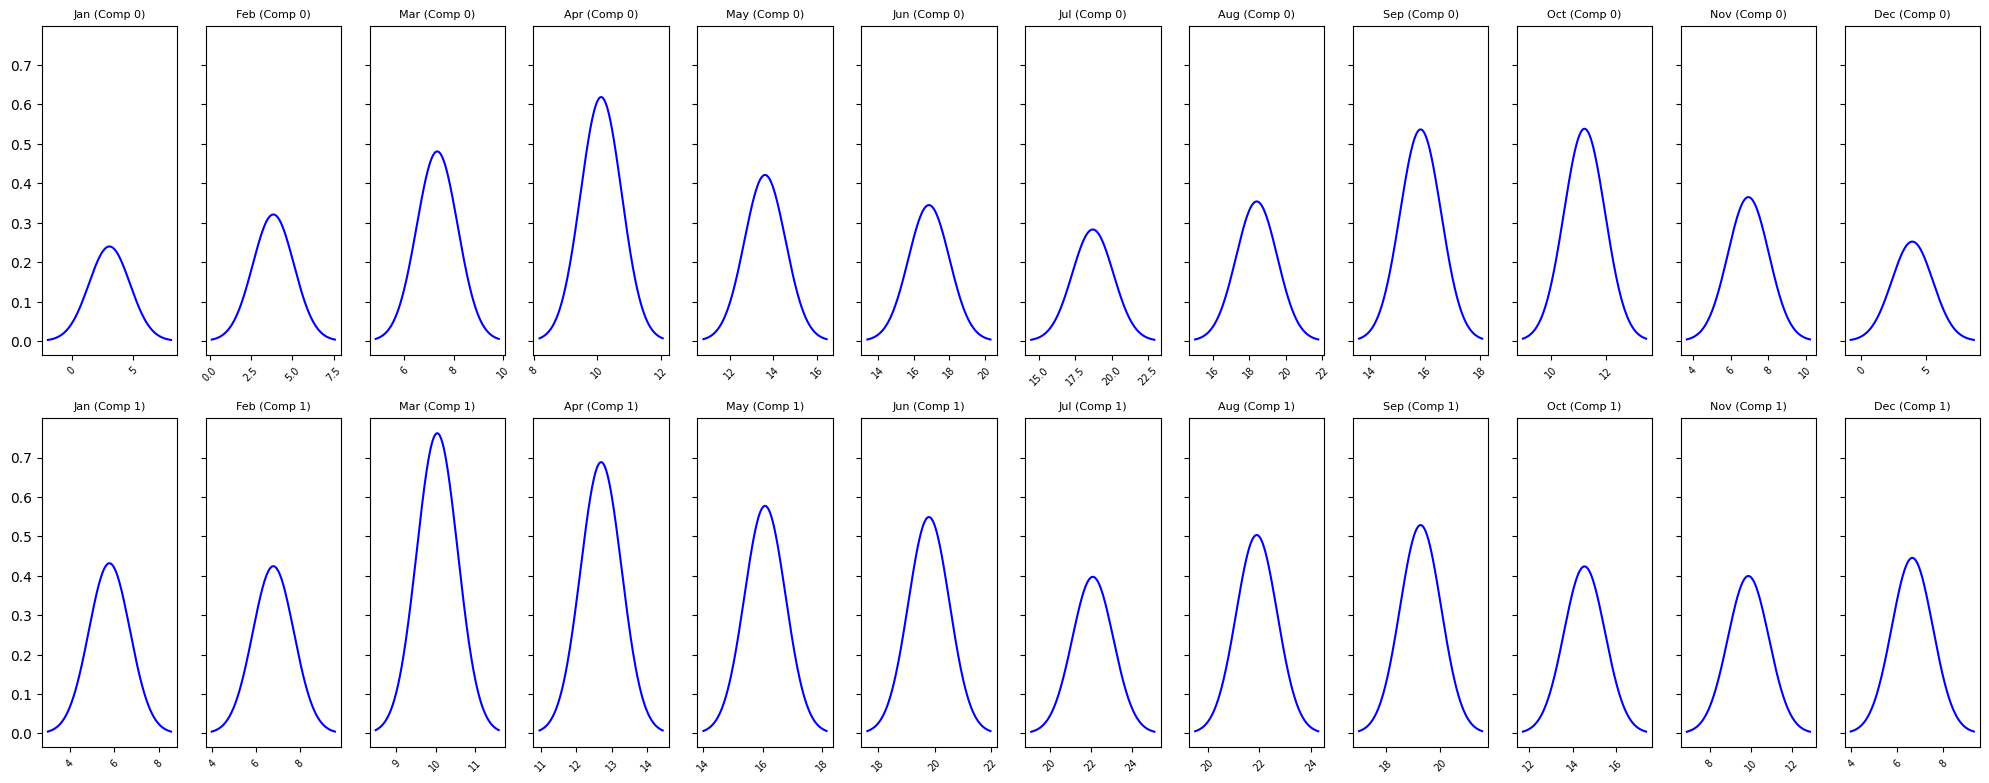

In [12]:
from scipy.stats import norm

n_comp = means_1.shape[0]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul",
          "Aug","Sep","Oct","Nov","Dec"]

fig, axes = plt.subplots(n_comp, 12, figsize=(20, 4*n_comp), sharey=True)

for k in range(n_comp):
    for m in range(12):
        ax = axes[k, m] if n_comp > 1 else axes[m]
        mu = means_1[k, m]
        sigma = stds_1[k, m]

        # Range for plotting (mean ± 3σ)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 200)
        y = norm.pdf(x, mu, sigma)

        ax.plot(x, y, color="blue")
        ax.set_title(f"{months[m]} (Comp {k})", fontsize=8)
        ax.tick_params(axis='x', labelrotation=45, labelsize=7)

plt.tight_layout()
plt.show()

Our average temperature plot above for all cities during each month suggested some random distributions. Here, we can see that for every month, we have a weighted sum of 2 gaussian distributions that should recover our samples.

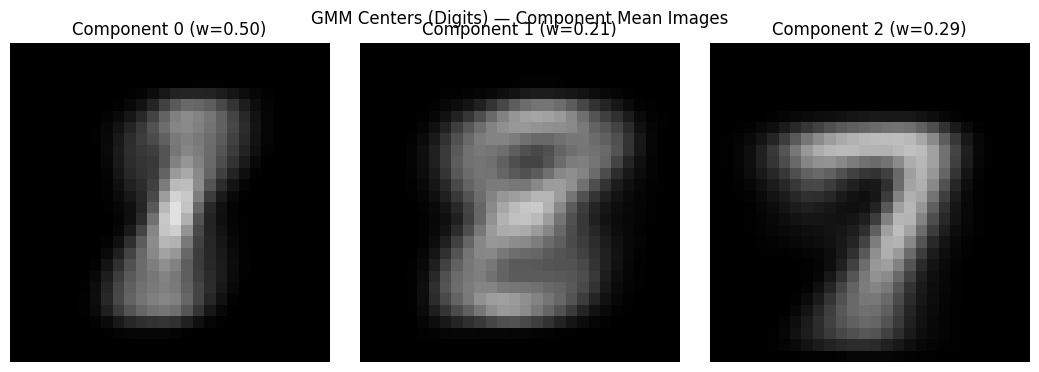

In [13]:
## for the digits dataset
means_2        = gmm_digits.means_
covariances_2  = gmm_digits.covariances_
weights_2      = gmm_digits.weights_

## to handle normalized values or regular ones
x2_max = np.max(x2)
if x2_max <= 1.01:
    vmin, vmax = 0.0, 1.0
elif x2_max <= 255 + 1e-6:
    vmin, vmax = 0.0, 255.0
else:
    vmin, vmax = means_2.min(), means_2.max()

n_comp = means_2.shape[0]
fig, axes = plt.subplots(1, n_comp, figsize=(3.5*n_comp, 3.5), constrained_layout=True)

if n_comp == 1:
    axes = [axes]

for k, ax in enumerate(axes):
    ax.imshow(means_2[k].reshape(28, 28), cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(f"Component {k} (w={weights_2[k]:.2f})")
    ax.axis("off")

plt.suptitle("GMM Centers (Digits) — Component Mean Images", y=1.02)
plt.show()


We can clearly recover the 3 centroids from KMeans, and here each of the distributions fitted represents one of the 3 digits. We also see that the component associated with digit 1 describes most samples. However, this could be due to the fact that some digits '7' look like the digit '1' and the model might be misinterpreting them. The blurriness might also be responsible for this kind of issues as well as the samples being corrupted or rotated.

3- Optimal 'K' and Grid Search

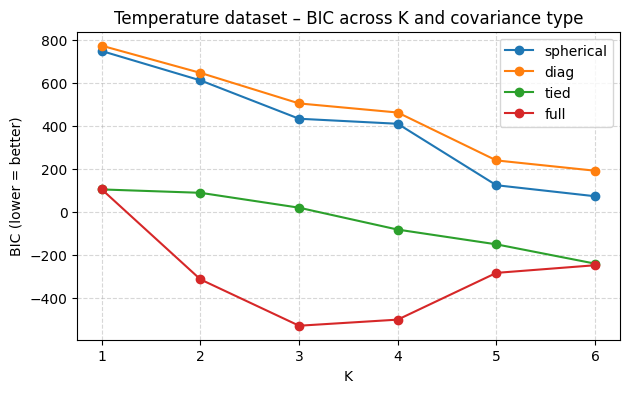

Best model: K=3, covariance='full', BIC=-528.19


In [14]:
## for temp dataset, I will do something like Grid Search to find the best set of hyperparameters

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

X = x1.astype(float)

Ks = range(1, 7)   # test K=1..6
cov_types = ["spherical", "diag", "tied", "full"]

results = []
for cov in cov_types:
    for K in Ks:
        gm = GaussianMixture(n_components=K, covariance_type=cov,
                             n_init=20, random_state=42)
        gm.fit(X)
        bic = gm.bic(X)
        aic = gm.aic(X)
        results.append((K, cov, bic, aic, gm))

bic_scores = {cov: [] for cov in cov_types}
for K, cov, bic, aic, gm in results:
    bic_scores[cov].append(bic)

plt.figure(figsize=(7,4))
for cov in cov_types:
    plt.plot(Ks, bic_scores[cov], marker='o', label=cov)
plt.xlabel("K")
plt.ylabel("BIC (lower = better)")
plt.title("Temperature dataset – BIC across K and covariance type")
plt.legend()
plt.grid(True, ls="--", alpha=0.5)
plt.show()

# Find best model
best = min(results, key=lambda t: t[2])  # pick lowest BIC
best_K, best_cov, best_bic, best_aic, best_model = best
print(f"Best model: K={best_K}, covariance='{best_cov}', BIC={best_bic:.2f}")


Here we should pick K=3 with a full Covariance type. This value for 'K' was one I discussed above and mentoned that it represented the best 3 centroids. I talked about the fact that when assigning cities that are close to each other from a temperature perspective might not give us a very accurate geographical location (for the cities Strasbourg and Lille). However, we'll check here, for this model if we'll get outliers.

The fact that we chose a 'full' covariance matrix is somehow logic, because the months are correlated. For example, the months of the winter season are correlated, not independent. It will have more parameters, will be harder to train, but will give better results. But we'll need more samples to avoid overfitting.

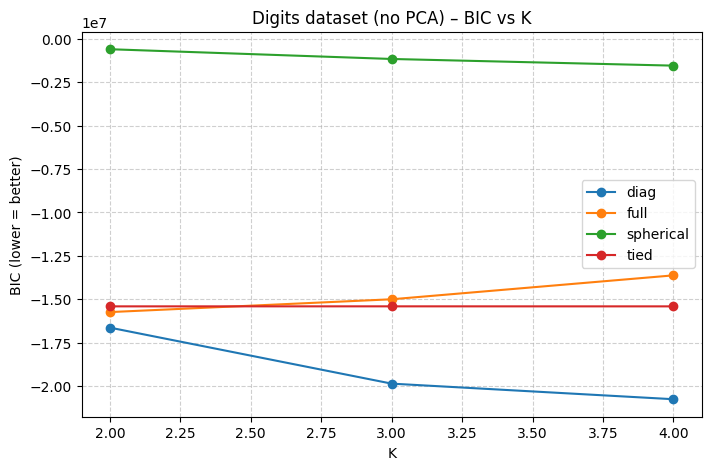

Best (digits): K=4, cov='diag', BIC=-20755187.99


In [27]:
X_digits = x2.astype(float)

Ks = range(2, 5)
cov_types =  ["diag", "full", 'spherical', 'tied']

results_digits = []
for cov in cov_types:
    for K in Ks:
        gm = GaussianMixture(
            n_components=K,
            covariance_type=cov,
            n_init=5,
            random_state=42
        )
        gm.fit(X_digits)
        bic = gm.bic(X_digits)
        aic = gm.aic(X_digits)
        results_digits.append((K, cov, bic, aic, gm))

# Plot BIC vs K for each covariance type
plt.figure(figsize=(8,5))
for cov in cov_types:
    bics = [bic for (K, c, bic, aic, gm) in results_digits if c == cov]
    plt.plot(list(Ks), bics, marker="o", label=cov)
plt.xlabel("K")
plt.ylabel("BIC (lower = better)")
plt.title("Digits dataset (no PCA) – BIC vs K")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Find best model
best_digits = min(results_digits, key=lambda t: t[2])  # based on BIC
best_K_d, best_cov_d, best_bic_d, best_aic_d, best_model_d = best_digits
print(f"Best (digits): K={best_K_d}, cov='{best_cov_d}', BIC={best_bic_d:.2f}")

Here it chose the diagonal covariance matrix maybe because the value of one pixel might not determine the value of another. However I would have thought that maybe close pixels would have close pixel values. The best model specifies K=4 but I will stick to K=3 because we know that we have 3 classes. The reason why it chose K=4 is as we said earlier due to the rotated and corrupted images that might fool a model.

Also, I assume that the pixels that are close to each other are somehow correlated, so I will stick to the 'full' covariance matrix. The reason is that later on, when I will test the model for prediction, having a 'full' covariance raised the score a lot. Also, when generating new samples, they were more realistic than when generated with a 'diag' covariance matrix.

However, in general GMM looks worse than KMeans for images because it is very probabilistic and the dimension of images is very high compared to the temperatures.

4- Log-Probability and Outlier Detection

In [ ]:
## I will re-fit the best GMM for the temp dataset

best_model_temp = GaussianMixture(
    n_components=3,
    covariance_type="full",
    n_init=5,
    random_state=42
)
best_model_temp.fit(x1)

GaussianMixture(n_components=3, n_init=5, random_state=42)

Outlier cities (temperature):
Strasbourg – log p = 32.42
Grenoble – log p = 32.42
Paris – log p = 32.42


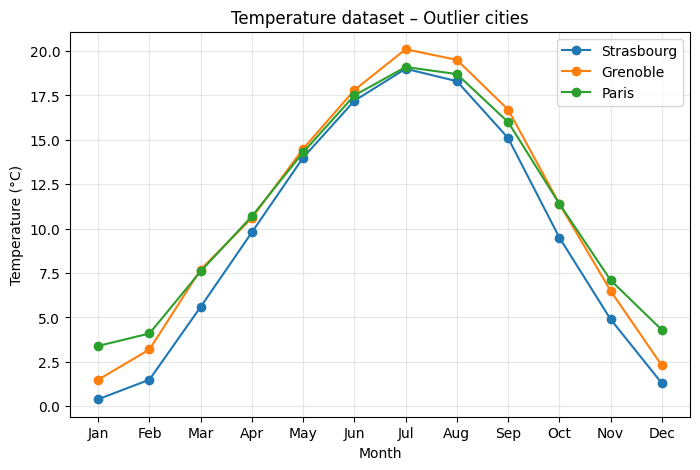

In [ ]:
## temperature dataset - log probability

log_probs_temp = best_model_temp.score_samples(x1)
idx_outliers_temp = np.argsort(log_probs_temp)[:3]

print("Outlier cities (temperature):")
for i in idx_outliers_temp:
    print(f"{temper['villes'][i]} – log p = {log_probs_temp[i]:.2f}")

# Plot their monthly profiles
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul",
          "Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(8,5))
for i in idx_outliers_temp:
    plt.plot(range(12), x1[i], marker="o", label=temper['villes'][i])
plt.xticks(range(12), months, rotation=0)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Temperature dataset – Outlier cities")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


This can somewhat be relevant. Strasbourg has a very low temperature compared to the others, which can explain why it was classified as an outlier.

Paris, I expected it to be clustered with Rennes & the others, but I explained that due to pollution its temperature might be higher than others.

Grenoble has also a cold temperature but then it has a hot summer, so maybe GMM classified it as an outlier because it couldn't understand whether it is a cold or hot city.

In [15]:
best_digit_model = GaussianMixture(
    n_components=3,
    covariance_type="full",
    n_init=5,
    random_state=42
)
best_digit_model.fit(x2)

GaussianMixture(n_components=3, n_init=5, random_state=42)

Digit outliers (lowest log probabilities):
Index 1952 – log p = -15088.87, true label = [1]
Index 514 – log p = -11943.32, true label = [7]
Index 3309 – log p = -9676.73, true label = [7]


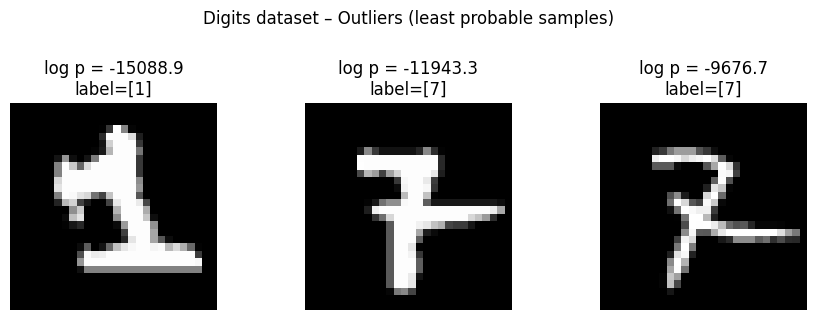

In [12]:
log_probs_digits = best_digit_model.score_samples(x2)
idx_outliers_digits = np.argsort(log_probs_digits)[:3]  # lowest 3

print("Digit outliers (lowest log probabilities):")
for i in idx_outliers_digits:
    print(f"Index {i} – log p = {log_probs_digits[i]:.2f}, true label = {y2[i]}")

plt.figure(figsize=(9,3))
for j, i in enumerate(idx_outliers_digits):
    plt.subplot(1, 3, j+1)
    plt.imshow(x2[i].reshape(28,28), cmap="gray")
    plt.title(f"log p = {log_probs_digits[i]:.1f}\nlabel={y2[i]}")
    plt.axis("off")
plt.suptitle("Digits dataset – Outliers (least probable samples)", y=1.05)
plt.tight_layout()
plt.show()


- The digit '1' is an outlier, due to the changes in sketch compared to other samples.
- The digit '7' looks good but many samples didn't have the middle horizontal line (even though it should), so maybe the GMM model here assumed this as an outlier.

5- Predicting the labels

In [17]:
from sklearn.metrics import rand_score, adjusted_rand_score

# Predict labels with the best GMM
y2_pred_gmm = best_digit_model.predict(x2)

# Compute Rand scores
ri_gmm  = rand_score(y2.ravel(), y2_pred_gmm)
ari_gmm = adjusted_rand_score(y2.ravel(), y2_pred_gmm)

print(f"GMM Rand Index (RI):     {ri_gmm:.4f}")
print(f"GMM Adjusted Rand Index: {ari_gmm:.4f}")

GMM Rand Index (RI):     0.8719
GMM Adjusted Rand Index: 0.7133


When running GMM with diagonal covariance matrix, I got a very bad Random Index (around 0.5), mainly because it assumed that all pixels are independent. But as we said earlier, pixels that are close to each other might be correlated as the whole region should have a certain pixel value. That's why I re-ran GMM with full covariance type and got a much better result.

GMM with full covariance matrix performed almost similar to KMeans. This is mainly because we have an increased number of parameters because our pixels are now correlated, but still it is slightly worse than KMeans. We could try to explain these results:
- We have a lot of parameters here but not a very high number of samples relative to the parameters.
- The Gaussian assumption might not be working here.
- KMeans might just be good enough while GMM too complex for this task.
- GMM is probabilistic and might not be working well with high dimensional data like images being  1x784 vectors.

To conclude, KMeans performs better than GMM and is much simpler and easier to train.

6- Sampling from the GMM (Bonus)

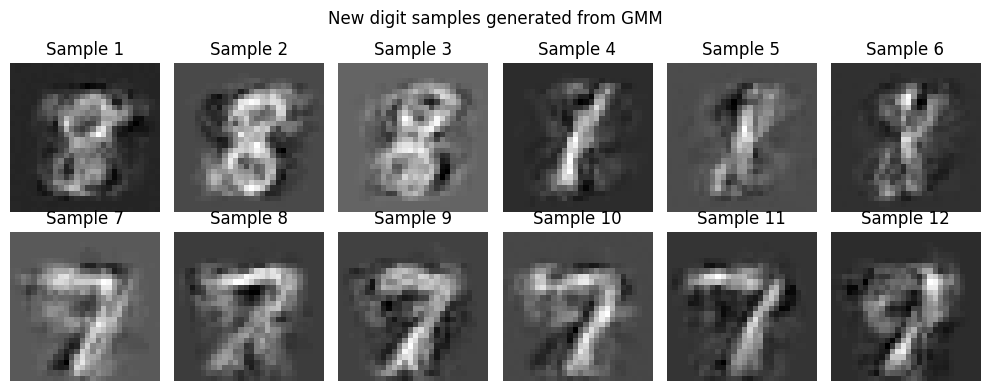

In [15]:
## Generate Samples
best_digit_model = GaussianMixture(
    n_components=3,
    covariance_type="full",
    n_init=5,
    random_state=42
)
best_digit_model.fit(x2)

n_samples=12
X_generated, y_generated = best_digit_model.sample(n_samples)

# Plot generated digits
plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_generated[i].reshape(28, 28), cmap="gray")
    plt.title(f"Sample {i+1}")
    plt.axis("off")

plt.suptitle("New digit samples generated from GMM")
plt.tight_layout()
plt.show()

The generated samples somehow look like true images, but they're very blurried. We can though recognize the structure of some digits (7 or 8). However, they are far from being exactly like real pictures. The reason is that this is a probabilistic model and it would be hard to generate exact pictures.

When I ran GMM with diagonal covariance it was impossible to recognize a digit, mainly because it assumed that close pixels don't necessarily have close values. However, with a full covariance matrix, it generated better pictures.

# Part 4- Dimensionality Reduction

4.1) Linear Projection: Principle Component Analysis

1- Covariance Matrix

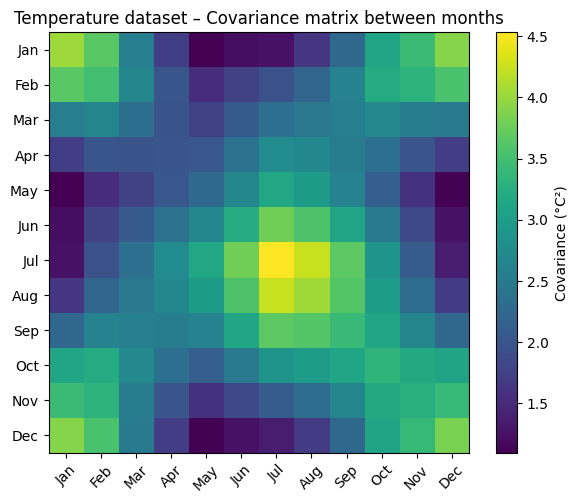

In [7]:
cov_temp = np.cov(x1.T)

plt.figure(figsize=(6,5))
plt.imshow(cov_temp, cmap="viridis")
plt.colorbar(label="Covariance (°C²)")
plt.title("Temperature dataset – Covariance matrix between months")
plt.xticks(range(12), ["Jan","Feb","Mar","Apr","May","Jun","Jul",
                       "Aug","Sep","Oct","Nov","Dec"], rotation=45)
plt.yticks(range(12), ["Jan","Feb","Mar","Apr","May","Jun","Jul",
                       "Aug","Sep","Oct","Nov","Dec"])
plt.tight_layout()
plt.show()


I will interpret few months:
1- January:
It is highly correlated with December and Februaru, as cold months might be related because of their close temperature behavior. There is no correlation with May->August as those represent the summer season.
2- June:
It is not correlated with the months from the winter seasonbut highly correlated with July and August for example.
3- October: It is not correlated with May -> August but highly correlated with November -> February.

We can say then that every month is correlated with its close neighbors especialy when they belong to the same season.

Winter and Summer months have highest variances as the others are like mid-seasons between the two (Autumn and Spring).

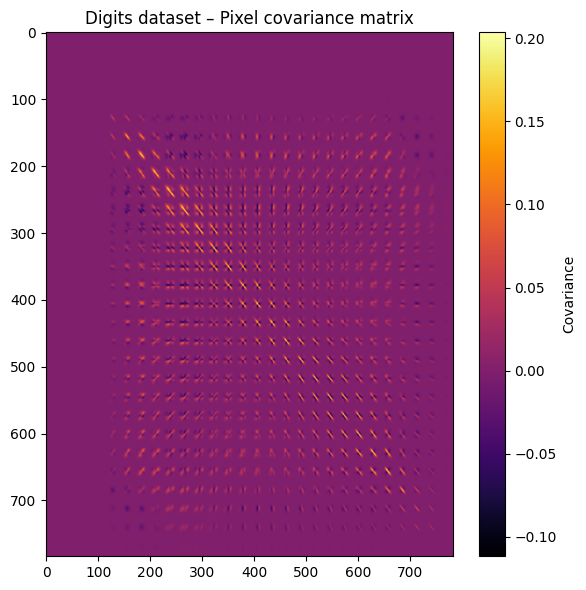

In [8]:
cov_digits = np.cov(x2.T)

plt.figure(figsize=(6,6))
plt.imshow(cov_digits, cmap="inferno", aspect="auto")
plt.colorbar(label="Covariance")
plt.title("Digits dataset – Pixel covariance matrix")
plt.tight_layout()
plt.show()

Many regions of the picture look uncorrelated with each other. On the diagonal, we can see good covariance which might be the variance of each pixel on the non-dark side. We can see some areas with covariance, and I expect that those represent the pixels that are close to each other, indicating that a bright area might have pixels with high and close values between them.

2- Computing the PCA with all dimensions

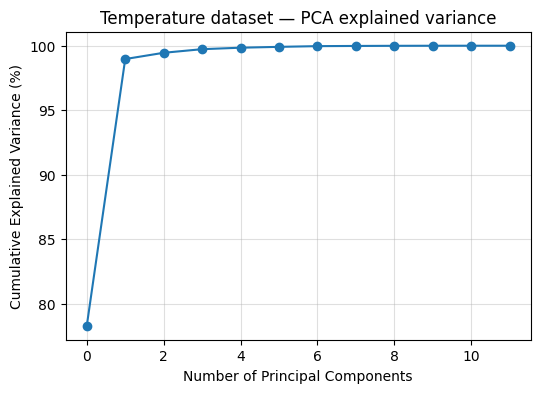

Temperature: Variance explained by first 2 PCs = 98.97%


In [9]:
from sklearn.decomposition import PCA

pca_temp = PCA(n_components=None)
pca_temp.fit(x1)

explained_var_temp = pca_temp.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(explained_var_temp)*100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Temperature dataset — PCA explained variance")
plt.grid(alpha=0.4)
plt.show()

print(f"Temperature: Variance explained by first 2 PCs = {np.sum(explained_var_temp[:2])*100:.2f}%")


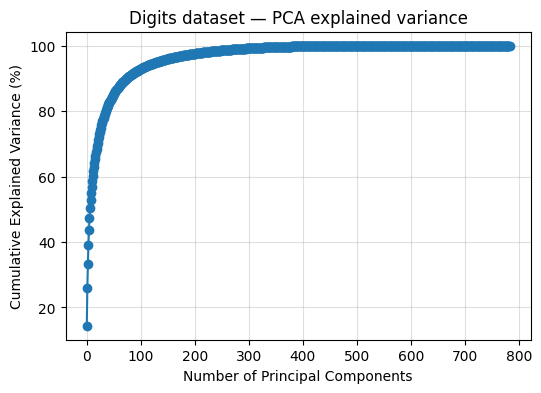

Digits: Variance explained by first 2 PCs = 26.03%


In [10]:
pca_digit= PCA(n_components=None)
pca_digit.fit(x2)

explained_var_digits = pca_digit.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(explained_var_digits)*100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Digits dataset — PCA explained variance")
plt.grid(alpha=0.4)
plt.show()

print(f"Digits: Variance explained by first 2 PCs = {np.sum(explained_var_digits[:2])*100:.2f}%")

- Temperature Dataset lies almost entirely in a 2D subspace. Projecting onto the first two principal components preserves about 99% of the information, making the model working perfectly.

- Digits Dataset cannot be well represented in only 2 dimensions — a 2D PCA projection keeps only 15 to 20% of the total variance, losing fine handwriting details. However, 50 to 100 PCs are enough to preserve most information (90%). This explains why visualization in 2D still shows rough clusters but not perfectly separated digits. This is due to the very high dimensions of images compared to temperature and it is not logic to have 2 dimensions representing 784.

3- Projecting in p=2

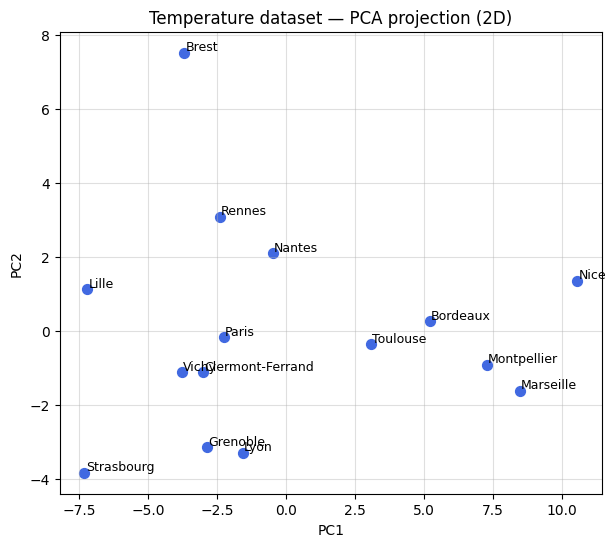

In [11]:
pca_temp= PCA(n_components=2)
pca_temp.fit(x1)

X_temp_pca = pca_temp.transform(x1)[:, :2]   # (15 × 2)

plt.figure(figsize=(7,6))
plt.scatter(X_temp_pca[:,0], X_temp_pca[:,1], color='royalblue', s=50)

# Label each city
for i, city in enumerate(temper['villes']):
    plt.text(X_temp_pca[i,0]+0.05, X_temp_pca[i,1]+0.05, city, fontsize=9)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Temperature dataset — PCA projection (2D)")
plt.grid(True, alpha=0.4)
plt.show()


We can see that some information regarding the location of the cities is preserved:
- Rennes and Nantes are still close to each other.
- Paris, Vichy, Clermond and Grenoble are still close o each other.
- Strasbourg and Lille look isolated, which is expected as I mentioned before they have a different temperature behavior.
- Marseille, Montpellier, Bordeaux, Nice and Toulouse are close to each other and at the right-side of the plot. This recovers a bit their true location that indicated a higher temperature behavior.

However, not all cities have a logical location on the PC-space compared to their true location, such as Grenoble and Brest.

But somehow, projecting the data on a lower dimensional space based on the first two eigenvectors of the covariance matrix can recover a slightly similar location for cities, and can also preserve cities that are close together based on their temperature.

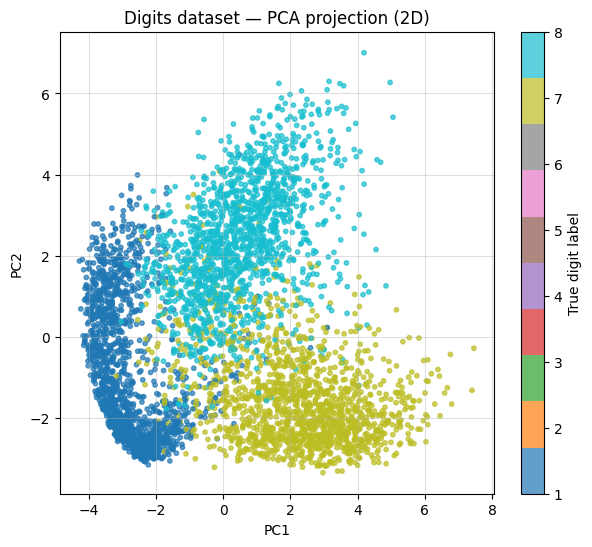

In [15]:
pca_digit = PCA(n_components=2)
pca_digit.fit(x2)

X_digits_pca = pca_digit.transform(x2)[:, :2]

plt.figure(figsize=(7,6))
scatter = plt.scatter(X_digits_pca[:,0], X_digits_pca[:,1],
                      c=y2, cmap='tab10', s=10, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits dataset — PCA projection (2D)")
plt.colorbar(scatter, label="True digit label")
plt.grid(True, alpha=0.4)
plt.show()


The 2D PCA projection of the digits dataset reveals three main clusters corresponding to digits 1, 7, and 8. Digits “1” appear on the left, well separated due to their simple vertical structure, while “7” and “8” overlap slightly since they share similar patterns like the curvature. The first principal component mainly captures the transition from thin/narrow digits (like “1”) to wider and rounder shapes (like “8”), while the second reflects curvature and closure (more curved digits have higher PC2 values). Although only about 15–20% of the total variance is preserved, PCA still captures the main geometric differences between digits, showing that samples with similar visual structures are close in this reduced space. Perhaps we should try to increase the dimension of the PCA for the digits dataset to see some clear patterns.

4- PCA: 2 components

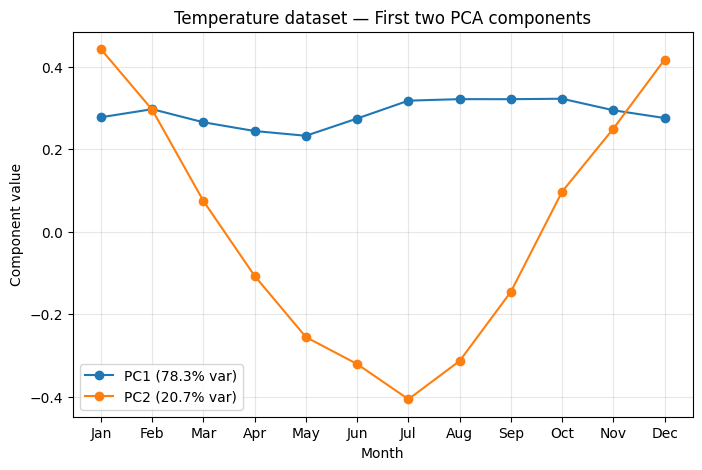

In [17]:
## I re-ran the model to make sure nothing canged in it
pca_temp = PCA(n_components=2)
pca_temp.fit(x1)

#two first principal directions
components_temp = pca_temp.components_   # shape (2, 12)
explained_var = pca_temp.explained_variance_ratio_

months = ["Jan","Feb","Mar","Apr","May","Jun",
          "Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(8,5))
for i in range(2):
    plt.plot(range(12), components_temp[i], marker='o', label=f"PC{i+1} ({explained_var[i]*100:.1f}% var)")

plt.xticks(range(12), months)
plt.xlabel("Month")
plt.ylabel("Component value")
plt.title("Temperature dataset — First two PCA components")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The first two principal components capture nearly all the variability in the temperature data, explaining about 99% of the total variance (78.3% for PC1 and 20.7% for PC2). The first component (PC1) remains almost constant throughout the year, indicating that it might represents the overall average temperature. Cities with higher PC1 scores should be warmer across all months (southern or coastal regions based on latitude and longitude), while those with lower scores might be colder (northern or mountainous regions, also based on coordinates).

The second component (PC2) follows a clear seasonal pattern — positive in winter months and negative in summer — showing that it captures the amplitude of seasonal variation. Cities with large positive PC2 values experience strong temperature contrasts between summer and winter, while cities with small or negative PC2 values have milder, more stable temperatures across the year. I expect the coefficient for PC2 to be negative so it adds a positve number when trying to reconstruct the samples.

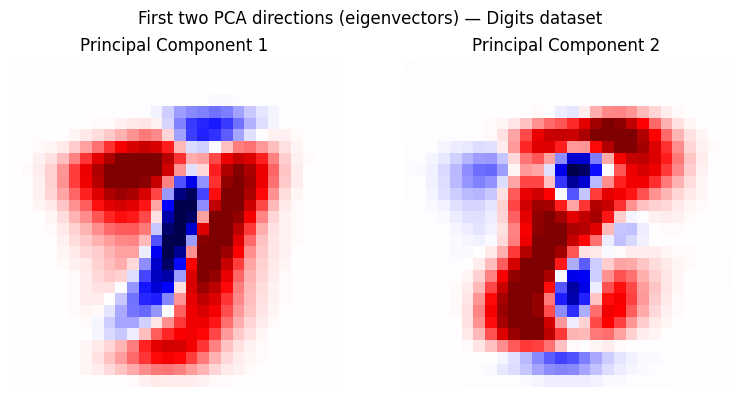

In [16]:
## viz the components

components = pca_digit.components_

plt.figure(figsize=(8,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(components[i].reshape(28,28), cmap="seismic", vmin=-0.1, vmax=0.1)
    plt.title(f"Principal Component {i+1}")
    plt.axis("off")

plt.suptitle("First two PCA directions (eigenvectors) — Digits dataset")
plt.tight_layout()
plt.show()

The first component shows a certain transition between vertical and diagonal shapes, so maybe moving along this direction transforms digits with thin vertical shapes, such as “1”, into wider, slanted forms resembling “7”. We can clearly notice the blue color resembling '1' and the red color '7'.

The second component reflects the shape of loops and curvature in the digits. Increasing this component adds circular patterns, turning straight digits (like “1” or “7”) into more rounded shapes similar to “8”.

5- Data Reconstruction

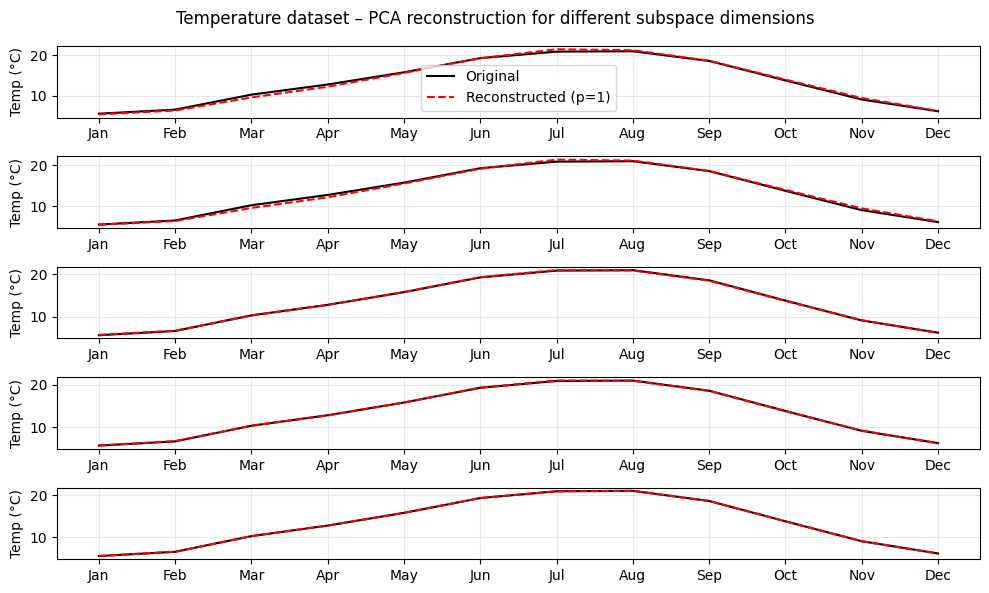

In [18]:
## Reconstruction for the temperature data
X = x1  # shape (15, 12)

# Choose different PCA dimensions
ps = [1, 2, 3, 5, 12]  # full = 12

plt.figure(figsize=(10,6))

for i, p in enumerate(ps):
    # Fit PCA
    pca = PCA(n_components=p)
    X_proj = pca.fit_transform(X)
    X_recon = pca.inverse_transform(X_proj)

    # Plot one city (e.g., first city)
    plt.subplot(len(ps), 1, i+1)
    plt.plot(range(12), X[0], 'k-', label='Original')
    plt.plot(range(12), X_recon[0], 'r--', label=f'Reconstructed (p={p})')
    plt.ylabel("Temp (°C)")
    plt.xticks(range(12), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
    plt.grid(alpha=0.3)
    if i == 0: plt.legend()

plt.suptitle("Temperature dataset – PCA reconstruction for different subspace dimensions")
plt.tight_layout()
plt.show()

With only one component (p=1), the reconstruction already captures the overall level and annual trend of the temperature, This means that the PCA’s first direction represents the city’s average temperature across the year. When increasing to two components (p=2), the model starts reproducing the seasonal variation (warm summers, cold winters) more accurately. Beyond three components (p≥3), the reconstructed curves become almost indistinguishable from the originals, as small month-to-month fluctuations are recovered.

This shows that the temperature dataset has a very low intrinsic dimensionality: most of the information can be explained by only two to three principal components corresponding to global temperature level and seasonal cycle. In other words, the yearly temperature pattern of each city can be summarized with just a few underlying climatic factors.

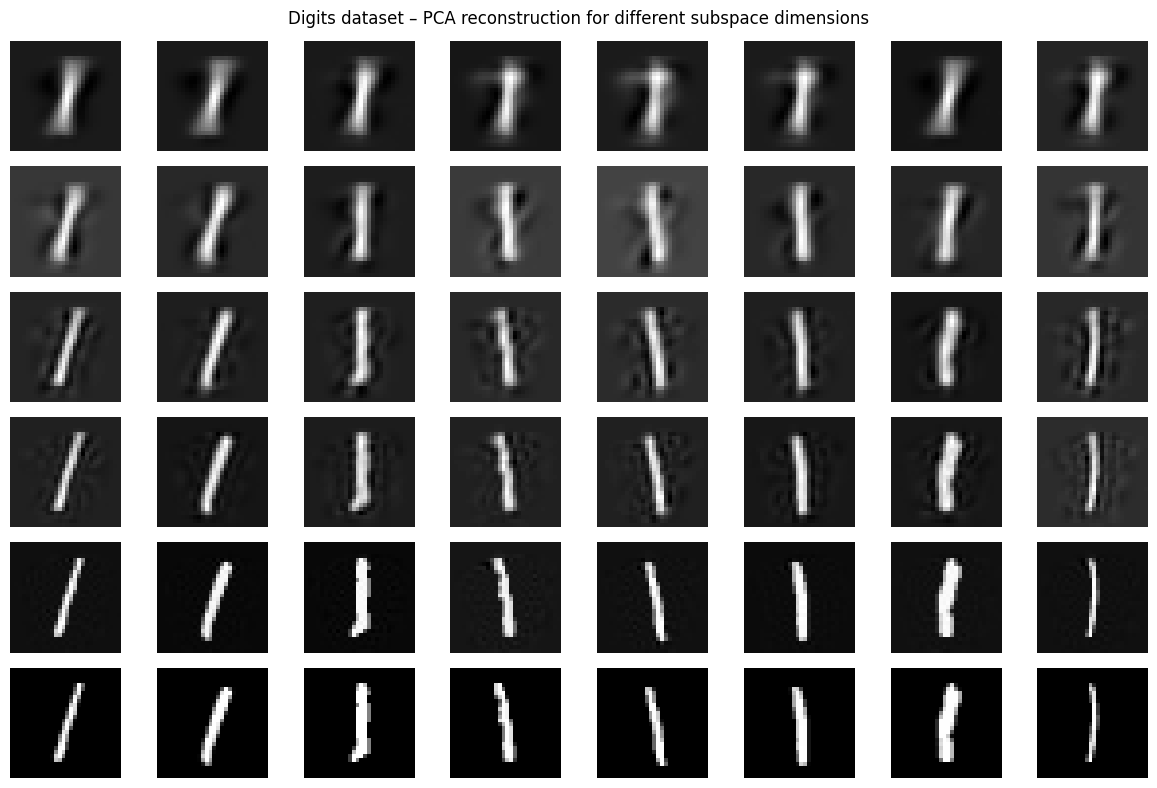

In [19]:
## digits data
X = x2  # shape (4500, 784)

ps = [2, 10, 50, 100, 300, 784]
n_show = 8  # number of samples to visualize

plt.figure(figsize=(12, 8))

for i, p in enumerate(ps):
    pca = PCA(n_components=p, random_state=42)
    X_proj = pca.fit_transform(X)
    X_recon = pca.inverse_transform(X_proj)

    # Show a few digits
    for j in range(n_show):
        plt.subplot(len(ps), n_show, i*n_show + j + 1)
        plt.imshow(X_recon[j].reshape(28,28), cmap="gray")
        plt.axis("off")
        if j == 0:
            plt.ylabel(f"p={p}", fontsize=10)

plt.suptitle("Digits dataset – PCA reconstruction for different subspace dimensions")
plt.tight_layout()
plt.show()

For very small subspace dimensions, the reconstructed digits are barely recognizable. As p increases to around 10–50, the digits’ main shapes become clearer, although fine details are still blurred. With p=100, or more, the reconstructions are nearly indistinguishable from the originals, capturing both the overall structure and local variations in handwriting.

This demonstrates that the digits dataset has a much higher needed dimensionality compared to the temperature data. Because handwritten digits vary widely in shape, thickness, and orientation, a large number of principal components is required to accurately reconstruct them. In summary, PCA effectively captures the main geometric patterns of the digits, but preserving high-frequency details (edges and corners) demands many components, highlighting the dataset’s complexity and variability.

4.2) Manifold Learning - T-SNE

1-2- Computing TSNE and Projection

In [1]:
from sklearn.manifold import TSNE

In [8]:
## Temperature
tsne_temp= TSNE(n_components=2, random_state=42, perplexity=4)
X_temp_tsne = tsne_temp.fit_transform(x1)

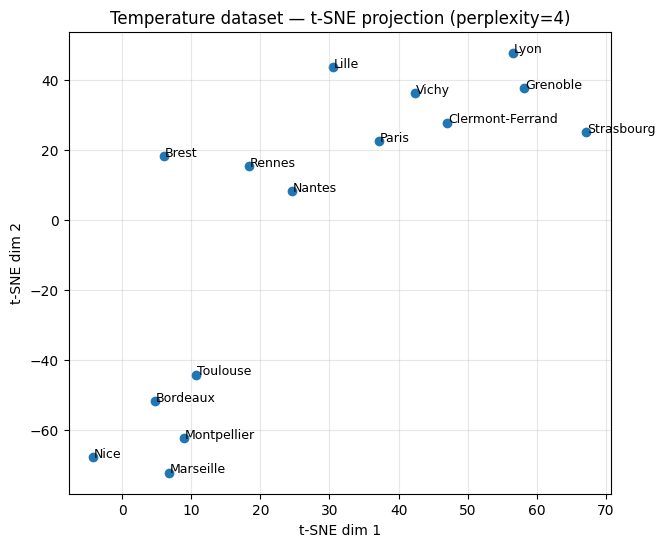

In [9]:
# Plot for the temp data
plt.figure(figsize=(7,6))
plt.scatter(X_temp_tsne[:,0], X_temp_tsne[:,1], color='tab:blue')

# Add city names
for i, city in enumerate(temper['villes']):
    plt.text(X_temp_tsne[i,0]+0.1, X_temp_tsne[i,1], city, fontsize=9)

plt.title("Temperature dataset — t-SNE projection (perplexity=4)")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.grid(alpha=0.3)
plt.show()

We can recover some information:
- Brest, Rennes and Nantes are still close to each other.
- Marseille, Nice, Montpellier, Bordeaux and Toulouse, having the highest temperatures, are located next to each other at the bottom left.
- Paris, Vichy, Clermond, Lyom and Grenoble are also next to each other.
However, Strasbourg and Lille, having different behavior, are located close to Paris and the others which might not be very relevant.

But in general we can say that TSNE can recover some geographical insights.

In [10]:
tsne_digit= TSNE(n_components=2, random_state=42, perplexity=25)
X_digits_tsne = tsne_digit.fit_transform(x2)

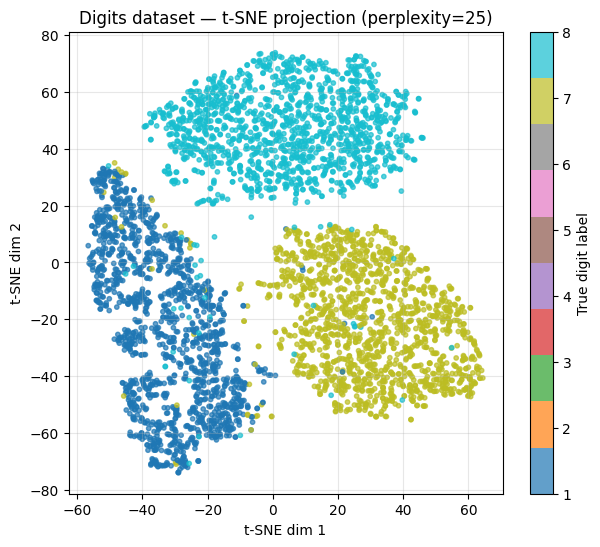

In [11]:
plt.figure(figsize=(7,6))
scatter = plt.scatter(X_digits_tsne[:,0], X_digits_tsne[:,1],
                      c=y2, cmap="tab10", s=10, alpha=0.7)

plt.title("Digits dataset — t-SNE projection (perplexity=25)")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.colorbar(scatter, label="True digit label")
plt.grid(alpha=0.3)
plt.show()

We can see that TSNE perfectly separated the three different digits. There are still few exceptions (maybe due to samples looking like others).

3) Perplexity Analysis

The perplexity parameter in t-SNE determines the balance between preserving local and global data structure. A low perplexity (5 for the temperature data) focuses on very local relationships, grouping together samples that are close in the original space, while a higher perplexity (25 for the digits data) incorporates broader neighborhood information, allowing t-SNE to capture more global organization of clusters.

for the digits dataset (perplexity = 25), t-SNE creates a highly discriminant 2D embedding. As shown in the plot, digits “1”, “7”, and “8” form well-separated clusters with clear boundaries, indicating that t-SNE effectively preserves class structure and local similarity between samples. Compared to PCA, which projects the data linearly, t-SNE provides a nonlinear mapping that better unfolds the complex manifold structure of handwritten digits. This results in a 2D visualization where digits belonging to the same class are tightly grouped, and distinct classes are clearly separated.

For the temperature dataset, we can also say that TSNE preserved close cities together (for example Brest, Rennes and Nantes).

Finally I will re-run TSNE with different values of perplexity to see if we can better visualizations.

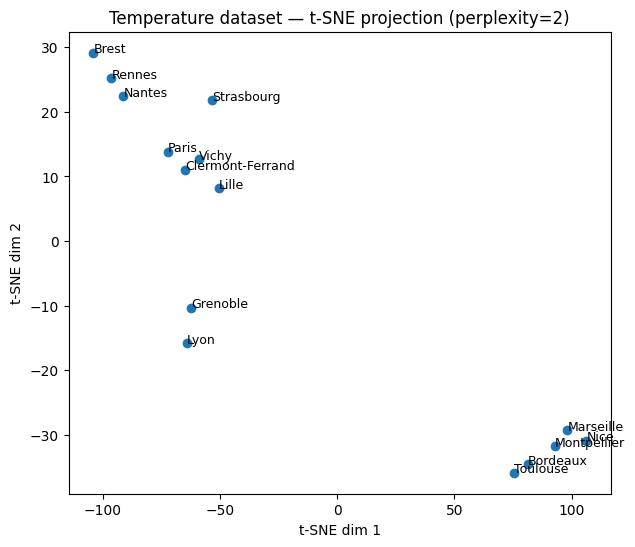

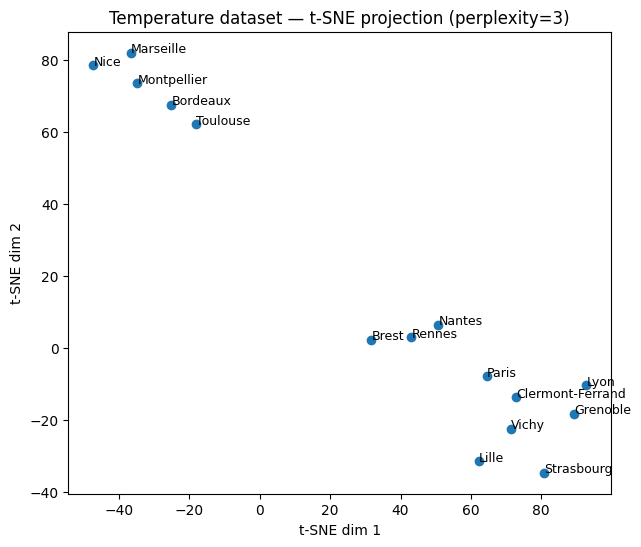

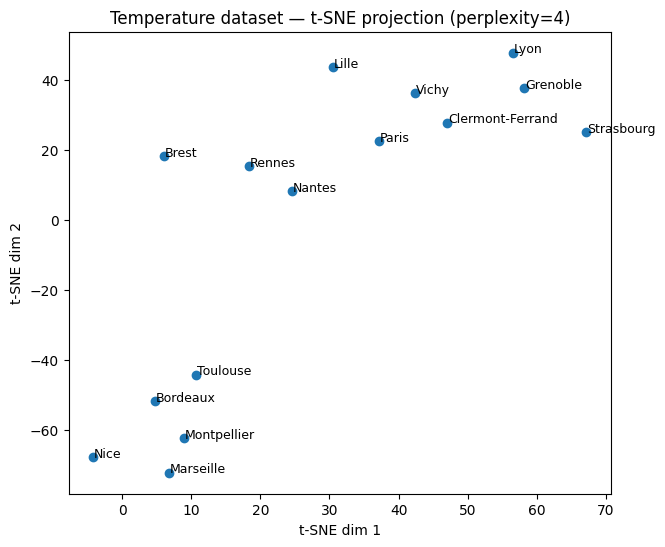

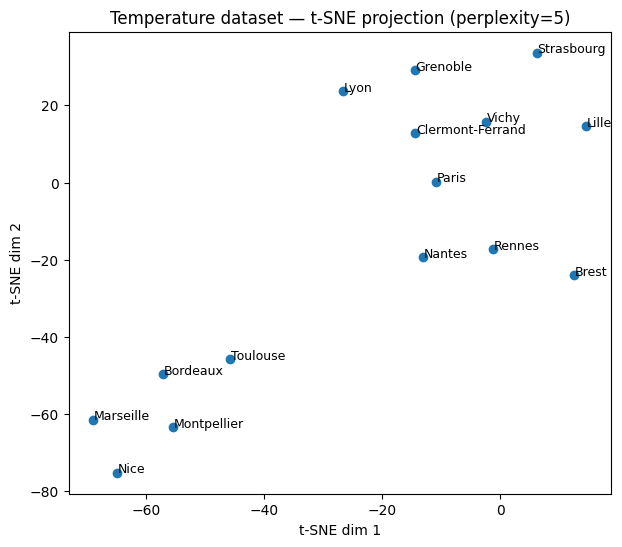

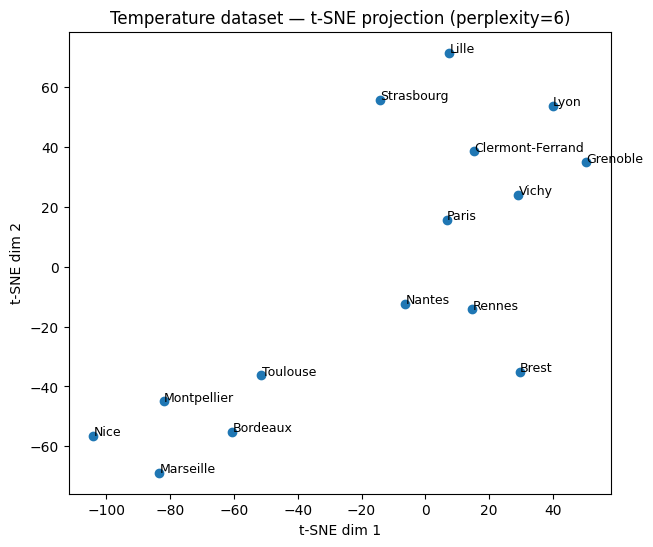

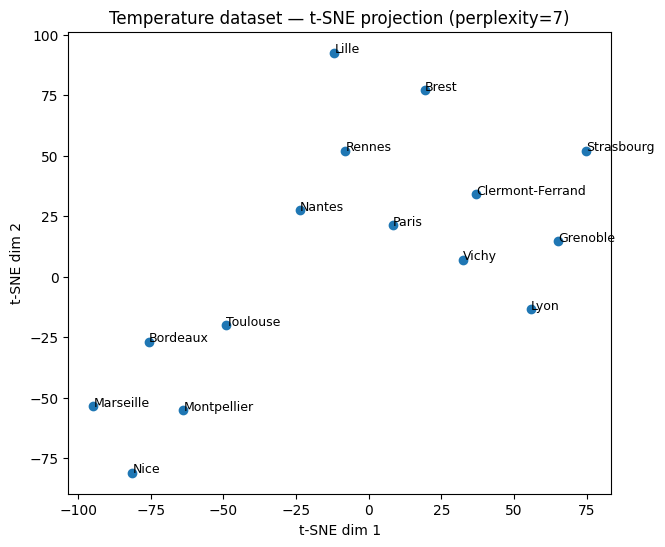

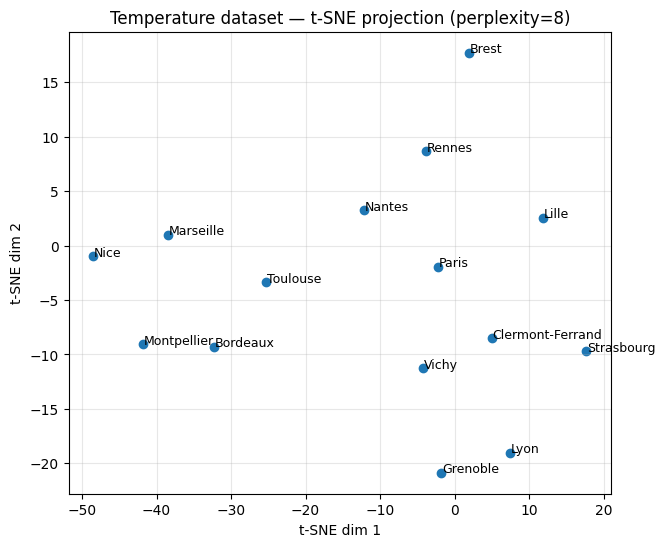

In [16]:
## Temperature dataset
perplexity = [2,3,  4, 5, 6, 7, 8]

for p in perplexity:
    tsne_temp = TSNE(n_components=2, random_state=42, perplexity=p)
    X_temp_tsne = tsne_temp.fit_transform(x1)

    plt.figure(figsize=(7,6))
    plt.scatter(X_temp_tsne[:,0], X_temp_tsne[:,1], color='tab:blue')

    # Add city names
    for i, city in enumerate(temper['villes']):
        plt.text(X_temp_tsne[i,0]+0.1, X_temp_tsne[i,1], city, fontsize=9)

    plt.title(f"Temperature dataset — t-SNE projection (perplexity={p})")
    plt.xlabel("t-SNE dim 1")
    plt.ylabel("t-SNE dim 2")
plt.grid(alpha=0.3)
plt.show()

I would say that perplexity = 3 generated the best results because when we increased it a lot, all projected data points became equally close to each other to preserve the initial neighborhood.

Perplexity =3 kept Strasbourg and Lilles a bit isolated which is logic, and all close cities that were close initially remained in the new space. I'd say TSNE is better than PCA as it recovered a better geographical location by preserving the neighborhood in a better way.

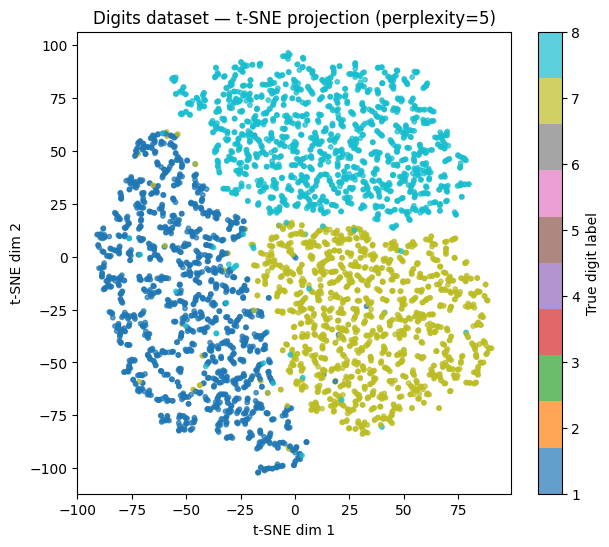

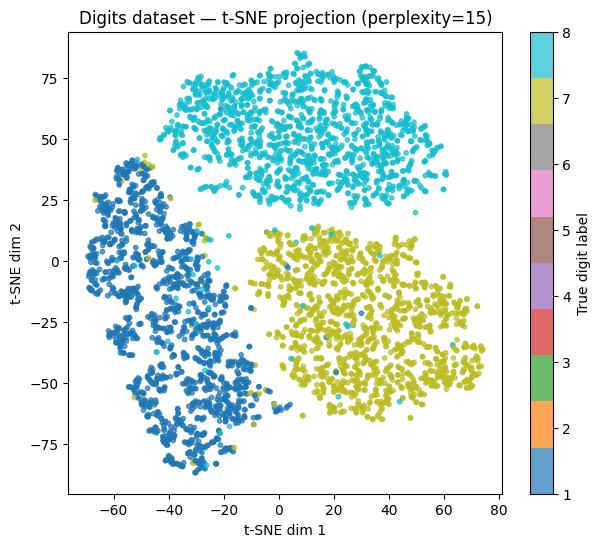

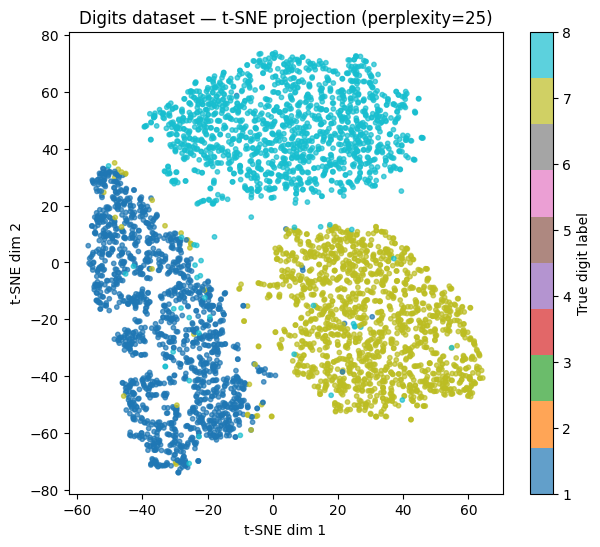

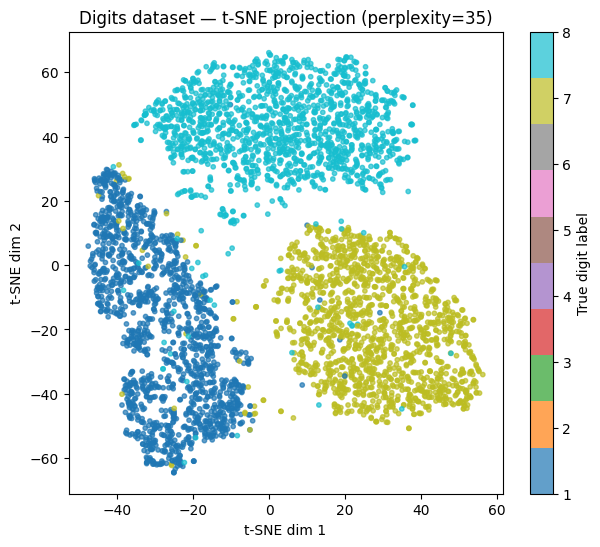

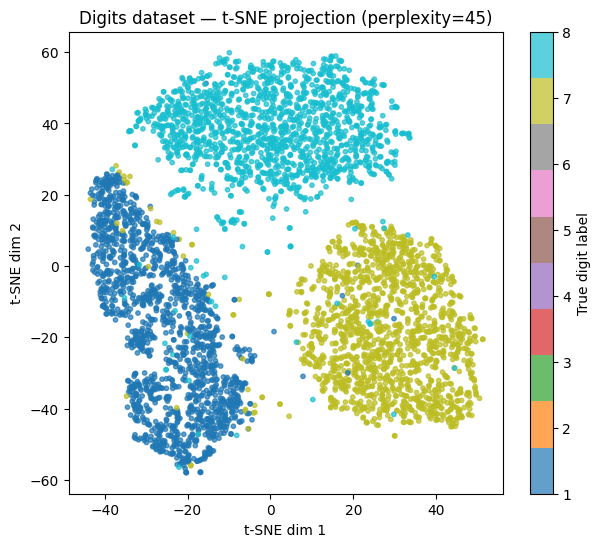

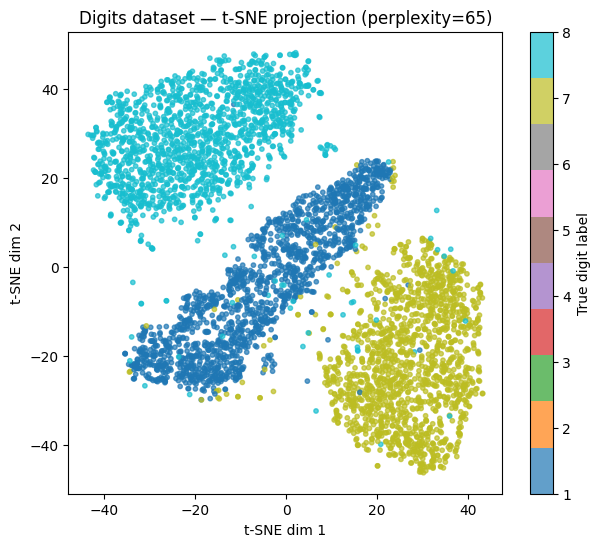

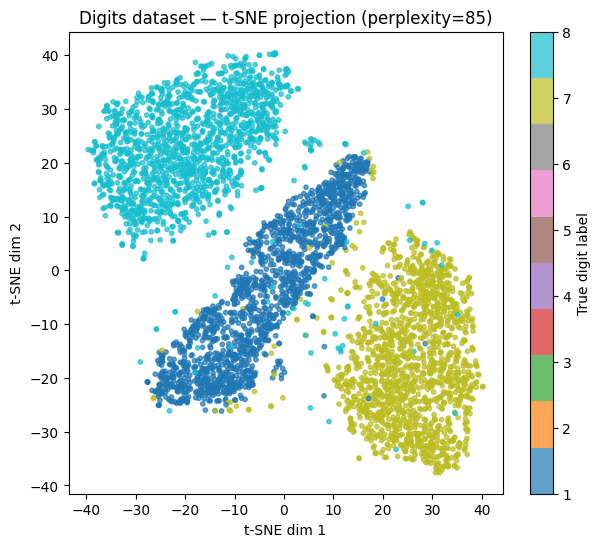

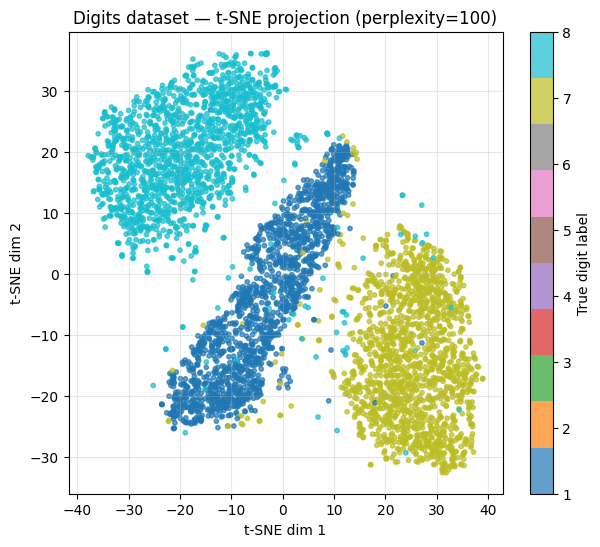

In [17]:
perplexity = [5, 15, 25, 35, 45, 65, 85, 100]

for p in perplexity:

  tsne_digit = TSNE(n_components=2, random_state=42, perplexity=p)
  X_digits_tsne = tsne_digit.fit_transform(x2)

  plt.figure(figsize=(7,6))
  scatter = plt.scatter(X_digits_tsne[:,0], X_digits_tsne[:,1],
                        c=y2, cmap="tab10", s=10, alpha=0.7)

  plt.title(f"Digits dataset — t-SNE projection (perplexity={p})")
  plt.xlabel("t-SNE dim 1")
  plt.ylabel("t-SNE dim 2")
  plt.colorbar(scatter, label="True digit label")
plt.grid(alpha=0.3)
plt.show()

Here, every time we increase the perplexity, we get a better embedding that separates well the digits' classes. Also, it is worth noting that the models separated them into exactly 3 classes, so it generalized even the cropped pictures into one class (for example, the rotated '1's ). We can still observe some misclassified points which might be due to the corrupted images looking like other classes. I'd say a perplexity of 25-35 is good enough based on the generated plots.

# To Conclude:
- KMeans, PCA and TSNE were able to recover the geographical locations of cities based on their temperature behavior. GMM was also able to recover a probabilistic interpretation for the samples, but it would have been better to have more samples for it. Although every model has its strengths and weaknesses, we can say that it is possible to recover the geographical locations of cities based on their temperature behaviors, as well as locate which ones have a different behavior than others (outlier detection in GMM).
- KMeans and TSNE performed the best to identify the different classes of digits. For KMeans, increasing the number of centroids created classes for rotated and modified images, as it started to cluster images based on tiny details. TSNE performed very well in representing the digits in 2D space mainly due to the fact that it projected samples while keeping similar ones close to their neighboors thanks to perplexity. GMM performed good on digits but it wasn't able to generate good samples. In my opinion, probabilistic models might not be very good to use with high dimensional data, and it is expensive to train them with 'full' covariance matrices due to the increased number of parameters. PCA, although linear, was still able to separate the 3 classes in the 2D space, but in order to catch the variance it needed around 100 dimensions.

## Discussion

- The session was very interesting as it gave me the ability to discover the generated intuitions of unsupervised learning. What I liked the most was the KMeans with K>3 on the images that has resulted in the model differentiating between rotated pictures.
- It was the first time that I work with dimensionality reduction and I liked the most t-SNE. It was remarkable to see that we can reduce an image to a point in a 2D space.
- Personally I didn't really like the part with Gaussian Mixture as I found little discussion for the temperature dataset. However, I liked the fact that one can generate new images with it. But it wasn't very interesting.
- I liked this course because it is different than a Deep Learning one. It is interesting to work with the basic models as in industry, they might be more efficient than black boxes.
- What was interesting in this lab is that we don't know the answer, unlike supervised learning tasks. Here we are trying to generate insights from our data, and I liked the fact that there might not be one correct answer but rather a critical and subjective interpretation of the results.
- The interpretation of the plots gave me a better critical thinking and I really liked that.
- For the future: perhaps replace GMM with GANs (even if it is deep learning) because it might be more interesting and might generate better images.

Thank you!